# **Tweet Analysis Project**

Analyzing the effects of COVID-19 on Olive Garden and similar chain restaurants.

BUSI 488-003 

Gamma Group

**IMPORTATIONS**

In [0]:

# From twitterscraper import query_tweets
# Install vaderSentiment.
import pandas as pd
import numpy as np
import datetime
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

**TWEET SCRAPING**

- We used the twitterscraper query_tweets function to scrape nine different sets of tweets.  

- Each of the three firms had three sets of tweets:
    - One from January 1-15, 2020, which captures pre-Corona Crisis sentiments
    - One from March 15-29, which captures mid-Corona Crisis sentiments
    - One from April 6-20, which captures post-Corona Crisis sentiments.  

- We wished to analyze initial customer reactions to the crisis in March as well as ongoing sentiments as the crisis continues in April.  
- We chose Olive Garden, Applebee’s, Denny’s, and Chipotle over other firms in part because these firms have unique names that differ from commonly used nouns

- We used both capitalized and lowercase versions of the firm name as the keyword arguments for the scraper.  

- After scraping each set of tweets using the given keywords and time frame, we converted that set into a csv file that we stored in a shared Google Drive.
- We created a data frame from each csv file.

In [0]:
# Applebees tweets for January 1-15, March 15-29, April 6-20 2020
app_jan=pd.read_csv('applebees_jan.csv')
app_mar=pd.read_csv('applebees_mar.csv')
app_apr=pd.read_csv('applebees_apr.csv')
# Chipotle tweets for January 1-15, March 15-29, April 6-20 2020
chi_jan=pd.read_csv('chipotle_jan.csv')
chi_mar=pd.read_csv('chipotle_mar.csv')
chi_apr=pd.read_csv('chipotle_apr.csv')
# Dennys tweets for January 1-15, March 15-29, April 6-20 2020
den_jan=pd.read_csv('dennys_jan.csv')
den_mar=pd.read_csv('dennys_mar.csv')
den_apr=pd.read_csv('dennys_apr.csv')
# Olive Garden tweets for January 1-15, March 15-29, April 6-20 2020
oli_jan=pd.read_csv('olive_garden_jan.csv')
oli_mar=pd.read_csv('olive_garden_mar.csv')
oli_apr=pd.read_csv('olive_garden_apr.csv')

**DATA SAMPLING**

- Each tweet set had a different number of entries, so for consistency, we drew random samples of 4800 entries from each data frame to analyze.  
- We chose 4800 because the data frame with the least number of entries had 4861.

In [0]:
import random
app_jan = app_jan.sample(n = 4800)
app_mar = app_mar.sample(n = 4800)
app_apr = app_apr.sample(n = 4800)
chi_jan = chi_jan.sample(n = 4800)
chi_mar = chi_mar.sample(n = 4800)
chi_apr = chi_apr.sample(n = 4800)
oli_jan = oli_jan.sample(n = 4800)
oli_mar = oli_mar.sample(n = 4800)
oli_apr = oli_apr.sample(n = 4800)

**DATA EXPLORATION**

- We examined data frame heads to view the attributes of a tweet entry.  
- Notable were the timestamp, tweet_id, text, likes, replies, and retweets attributes.  
- The text attribute contains the actual tweet string from which we can extract sentiments.

In [0]:
app_jan.head()

Unnamed: 0            timestamp  \
3851        3851  2020-01-10 17:52:21   
4618        4618  2020-01-02 00:39:59   
4143        4143  2020-01-02 21:21:12   
2099        2099  2020-01-14 22:45:25   
2438        2438  2020-01-14 04:14:02   

                                           username     screen_name  \
3851                                  Matthew Hyatt  hyattlikehotel   
4618                                       jessi ✨✨        jessntra   
4143  Lincoln Duncan is my name, here's my song🌊🇺🇸💯         pawdebb   
2099                         🖤🤘🏼 𝗗’𝘆𝗮 𝗹𝗶𝗸𝗲 𝗯𝗮𝘀𝘀? ✨💞  basshead_babie   
2438                                Skyler Burkardt  BurkardtSkyler   

                 user_id             tweet_id  \
3851  977677554743209984  1215692870222479360   
4618            19425755  1212533965996859393   
4143           443428247  1212846326582517760   
2099           427981403  1217216176184385536   
2438  946982665726566402  1216936487477841921   

                                                   text  likes  replies  \
3851    Wouldn't eat AB if my life depended on it. Lol.      0        0   
4618  @Applebees decided to chance it. Ordered a med...      0        2   
4143                                 bookmarked..thanks      1        0   
2099              Craigery!! 😳 sir this is an applebees      1        0   
2438                                       More options      0        0   

      retweets                                   tweet_url  parent_tweet_id  
3851         0  /hyattlikehotel/status/1215692870222479360     1.214242e+18  
4618         0        /jessntra/status/1212533965996859393              NaN  
4143         0         /pawdebb/status/1212846326582517760     1.212839e+18  
2099         0  /basshead_babie/status/1217216176184385536     1.216928e+18  
2438         0  /BurkardtSkyler/status/1216936487477841921     1.216766e+18

**DATA PREPROCESSING**

- To prepare for sentiment analysis, we used Python’s regular expressions feature to remove specific patterns from the tweet texts.  
- We removed urls and image addresses as well as the # and @ characters, all of which the sentiment intensity analyzer cannot interpret.  
- Additionally, we removed the “FAV” and “RE” strings, because these are default strings that symbolize favorites and retweets, not actual words with potential sentiment. 

- We removed expressions by replacing them with empty strings.  
- Afterwards, we replaced any double spaces that may have resulted from this operation with single spaces.

In [0]:
# Import regular expressions
import re

# Set-up patterns to be removed fro the tweets
pat1 = r"http\S+"
pat2 = r"#"
pat3 = r"@"
pat4 = r"FAV"
pat5 = r"RE"
pat6 = r"pic.\S+"
combined_pat = r'|'.join((pat1, pat2, pat3, pat4, pat5, pat6))

# Replace the patterns with an empty string
app_jan['stripped'] =  [re.sub(combined_pat, '', w) for w in app_jan.text]

# Remove double empty spaces
app_jan['stripped']  = [re.sub(r"  ", ' ', w) for w in app_jan.loc[:,'stripped']]

# Print tweets
#for i in range(0,12):
    #print(app_jan.stripped[i])
    #print('\n')

**SENTIMENT ANALYSIS**

- We used the Sentiment Intensity Analyzer to obtain a C_Score from each cleaned tweet text.  C Scores range between -1 and 1, with lower C Scores indicating more negative sentiments.

- We created a data frame of the tweet texts and their corresponding C Scores.

In [0]:
analyser = SentimentIntensityAnalyzer()

# Now get the compound sentiment score for each tweet
app_jan['C_Score'] = np.nan
for index, row in app_jan.iterrows(): 
    app_jan.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
# Let's take a look!
pd.set_option('display.max_colwidth', -1)
app_jan[['stripped','C_Score']].head(-50)

stripped  \
3851  Wouldn't eat AB if my life depended on it. Lol.                                                                                                                                                                                          
4618  Applebees decided to chance it. Ordered a medium steak. This isn't medium. Asked for a new one and was told it would be a while because the kitchen is backed up. Wtf                                                                    
4143  bookmarked..thanks                                                                                                                                                                                                                       
2099  Craigery!! 😳 sir this is an applebees                                                                                                                                                                                                    
2438  More options                                                                                                                                                                                                                             
...            ...                                                                                                                                                                                                                             
3816  Hello Colorado! Specifically Westminster and Northglenn. Upward Basketball is hosting a fundraiser at Applebees. Kids eat free and all proceeds go UpwardSports1. Retweet for a good cause! FridayThoughts Life is good. FridayFeeling   
2271  Me and xo_gabbers at applebees after the life after death party  …                                                                                                                                                                       
1638  I like the way you think!                                                                                                                                                                                                                
3045  The manager god rid of the customer. D\nSeriously dont go after the mans job. Those situations are very hard for those in customer service.                                                                                              
885   Super glad I just spent 30 bucks on a steak from Applebees for it to be 70% fat and damn near uncuttable with a steak knife. Also the sides were super whack NeverAgain                                                                  

      C_Score  
3851  0.4215   
4618 -0.4019   
4143  0.0000   
2099  0.0000   
2438  0.0000   
...      ...   
3816  0.8652   
2271 -0.2960   
1638  0.4199   
3045 -0.0754   
885   0.8442   

[4750 rows x 2 columns]

**SENTIMENT CLASSIFICATION**

- We categorized tweets with a C Score above 0.05 as positive tweets
- We categorized weets with a C Score below -0.05 as negative tweets
- We categorized and tweets with a C Score from -0.05 to 0.05 as neutral tweets. 






In [0]:
app_jan['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in app_jan.iterrows(): 
    if app_jan.loc[index, 'C_Score'] > 0.05 : 
            app_jan.loc[index, 'Sentiment'] = "Positive"       
    elif app_jan.loc[index, 'C_Score'] < -0.05 :
            app_jan.loc[index, 'Sentiment'] = "Negative"   
    else : 
        app_jan.loc[index, 'Sentiment'] = "Neutral"

**DATA VISUALIZATION**

- To visualize our data, we used matplotlib to create wedge plots.  
- This allows us to better visualize and analyze the distribution of positive, negative, and neutral tweet sentiments.

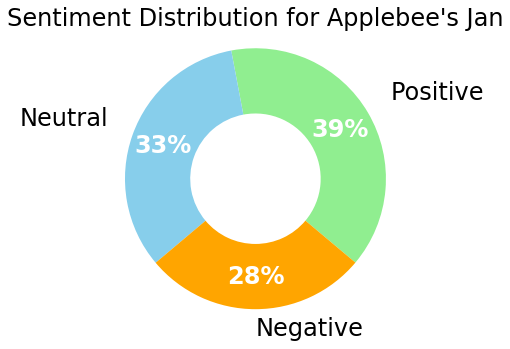

In [0]:
# DATA VISUALIZATION

# To visualize our data, we used matplotlib to create wedge plots.  
# This allows us to better visualize and analyze the distribution of positive, negative, and neutral tweet sentiments.
import matplotlib.pyplot as plt

# Set font size.
plt.rcParams['font.size']=24

# Define figure.
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))

# Get count by sentiment category from tweets_df.
sentiment_counts = app_jan.Sentiment.value_counts()
labels = sentiment_counts.index

# Define colors.
color_palette_list = ['lightgreen', 'skyblue', 'orange']

# Generate graph components
wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

# Plot wedges.
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
# Set title
ax.set_title("Sentiment Distribution for Applebee's Jan", y=.95, fontsize = 24)

# Show Wedge Chart
plt.show()

**PRE-PROCESSING ALL DATA SETS**

In [0]:
app_mar['stripped'] =  [re.sub(combined_pat, '', w) for w in app_mar.text]
app_mar['stripped']  = [re.sub(r"  ", ' ', w) for w in app_mar.loc[:,'stripped']]

In [0]:
app_apr['stripped'] =  [re.sub(combined_pat, '', w) for w in app_apr.text]
app_apr['stripped']  = [re.sub(r"  ", ' ', w) for w in app_apr.loc[:,'stripped']]

In [0]:
chi_jan['stripped'] =  [re.sub(combined_pat, '', w) for w in chi_jan.text]
chi_jan['stripped']  = [re.sub(r"  ", ' ', w) for w in chi_jan.loc[:,'stripped']]

In [0]:
chi_mar['stripped'] =  [re.sub(combined_pat, '', w) for w in chi_mar.text]
chi_mar['stripped']  = [re.sub(r"  ", ' ', w) for w in chi_mar.loc[:,'stripped']]

In [0]:
chi_apr['stripped'] =  [re.sub(combined_pat, '', w) for w in chi_apr.text]
chi_apr['stripped']  = [re.sub(r"  ", ' ', w) for w in chi_apr.loc[:,'stripped']]

In [0]:
den_jan['stripped'] =  [re.sub(combined_pat, '', w) for w in den_jan.text]
den_jan['stripped']  = [re.sub(r"  ", ' ', w) for w in den_jan.loc[:,'stripped']]

In [0]:
den_mar['stripped'] =  [re.sub(combined_pat, '', w) for w in den_mar.text]
den_mar['stripped']  = [re.sub(r"  ", ' ', w) for w in den_mar.loc[:,'stripped']]

In [0]:
den_apr['stripped'] =  [re.sub(combined_pat, '', w) for w in den_apr.text]
den_apr['stripped']  = [re.sub(r"  ", ' ', w) for w in den_apr.loc[:,'stripped']]

In [0]:
oli_jan['stripped'] =  [re.sub(combined_pat, '', w) for w in oli_jan.text]
oli_jan['stripped']  = [re.sub(r"  ", ' ', w) for w in oli_jan.loc[:,'stripped']]

In [0]:
oli_mar['stripped'] =  [re.sub(combined_pat, '', w) for w in oli_mar.text]
oli_mar['stripped']  = [re.sub(r"  ", ' ', w) for w in oli_mar.loc[:,'stripped']]

In [0]:
oli_apr['stripped'] =  [re.sub(combined_pat, '', w) for w in oli_apr.text]
oli_apr['stripped']  = [re.sub(r"  ", ' ', w) for w in oli_apr.loc[:,'stripped']]

**PERFORMING SENTIMENT ANALYSIS ON ALL DATA SETS**

In [0]:
app_mar['C_Score'] = np.nan
for index, row in app_mar.iterrows(): 
    app_mar.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
app_mar['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in app_mar.iterrows(): 
    if app_mar.loc[index, 'C_Score'] > 0.05 : 
            app_mar.loc[index, 'Sentiment'] = "Positive"       
    elif app_mar.loc[index, 'C_Score'] < -0.05 :
            app_mar.loc[index, 'Sentiment'] = "Negative"   
    else : 
        app_mar.loc[index, 'Sentiment'] = "Neutral"

In [0]:
app_apr['C_Score'] = np.nan
for index, row in app_apr.iterrows(): 
    app_apr.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
app_apr['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in app_apr.iterrows(): 
    if app_apr.loc[index, 'C_Score'] > 0.05 : 
            app_apr.loc[index, 'Sentiment'] = "Positive"       
    elif app_apr.loc[index, 'C_Score'] < -0.05 :
            app_apr.loc[index, 'Sentiment'] = "Negative"   
    else : 
        app_apr.loc[index, 'Sentiment'] = "Neutral"

In [0]:
chi_jan['C_Score'] = np.nan
for index, row in chi_jan.iterrows(): 
    chi_jan.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
chi_jan['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in chi_jan.iterrows(): 
    if chi_jan.loc[index, 'C_Score'] > 0.05 : 
            chi_jan.loc[index, 'Sentiment'] = "Positive"       
    elif chi_jan.loc[index, 'C_Score'] < -0.05 :
            chi_jan.loc[index, 'Sentiment'] = "Negative"   
    else : 
        chi_jan.loc[index, 'Sentiment'] = "Neutral"

In [0]:
chi_mar['C_Score'] = np.nan
for index, row in chi_mar.iterrows(): 
    chi_mar.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
chi_mar['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in chi_mar.iterrows(): 
    if chi_mar.loc[index, 'C_Score'] > 0.05 : 
            chi_mar.loc[index, 'Sentiment'] = "Positive"       
    elif chi_mar.loc[index, 'C_Score'] < -0.05 :
            chi_mar.loc[index, 'Sentiment'] = "Negative"   
    else : 
        chi_mar.loc[index, 'Sentiment'] = "Neutral"

In [0]:
chi_apr['C_Score'] = np.nan
for index, row in chi_apr.iterrows(): 
    chi_apr.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
chi_apr['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in chi_apr.iterrows(): 
    if chi_apr.loc[index, 'C_Score'] > 0.05 : 
            chi_apr.loc[index, 'Sentiment'] = "Positive"       
    elif chi_apr.loc[index, 'C_Score'] < -0.05 :
            chi_apr.loc[index, 'Sentiment'] = "Negative"   
    else : 
        chi_apr.loc[index, 'Sentiment'] = "Neutral"

In [0]:
den_jan['C_Score'] = np.nan
for index, row in den_jan.iterrows(): 
    den_jan.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
den_jan['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in den_jan.iterrows(): 
    if den_jan.loc[index, 'C_Score'] > 0.05 : 
            den_jan.loc[index, 'Sentiment'] = "Positive"       
    elif den_jan.loc[index, 'C_Score'] < -0.05 :
            den_jan.loc[index, 'Sentiment'] = "Negative"   
    else : 
        den_jan.loc[index, 'Sentiment'] = "Neutral"

In [0]:
den_mar['C_Score'] = np.nan
for index, row in den_mar.iterrows(): 
    den_mar.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
den_mar['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in den_mar.iterrows(): 
    if den_mar.loc[index, 'C_Score'] > 0.05 : 
            den_mar.loc[index, 'Sentiment'] = "Positive"       
    elif den_mar.loc[index, 'C_Score'] < -0.05 :
            den_mar.loc[index, 'Sentiment'] = "Negative"   
    else : 
        den_mar.loc[index, 'Sentiment'] = "Neutral"

In [0]:
den_apr['C_Score'] = np.nan
for index, row in den_apr.iterrows(): 
    den_apr.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
den_apr['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in den_apr.iterrows(): 
    if den_apr.loc[index, 'C_Score'] > 0.05 : 
            den_apr.loc[index, 'Sentiment'] = "Positive"       
    elif den_apr.loc[index, 'C_Score'] < -0.05 :
            den_apr.loc[index, 'Sentiment'] = "Negative"   
    else : 
        den_apr.loc[index, 'Sentiment'] = "Neutral"

In [0]:
oli_jan['C_Score'] = np.nan
for index, row in oli_jan.iterrows(): 
    oli_jan.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
oli_jan['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in oli_jan.iterrows(): 
    if oli_jan.loc[index, 'C_Score'] > 0.05 : 
            oli_jan.loc[index, 'Sentiment'] = "Positive"       
    elif oli_jan.loc[index, 'C_Score'] < -0.05 :
            oli_jan.loc[index, 'Sentiment'] = "Negative"   
    else : 
        oli_jan.loc[index, 'Sentiment'] = "Neutral"

In [0]:
oli_mar['C_Score'] = np.nan
for index, row in oli_mar.iterrows(): 
    oli_mar.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
oli_mar['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in oli_mar.iterrows(): 
    if oli_mar.loc[index, 'C_Score'] > 0.05 : 
            oli_mar.loc[index, 'Sentiment'] = "Positive"       
    elif oli_mar.loc[index, 'C_Score'] < -0.05 :
            oli_mar.loc[index, 'Sentiment'] = "Negative"   
    else : 
        oli_mar.loc[index, 'Sentiment'] = "Neutral"

In [0]:
oli_apr['C_Score'] = np.nan
for index, row in oli_apr.iterrows(): 
    oli_apr.loc[index, 'C_Score'] = analyser.polarity_scores(row['stripped'])['compound']
    
oli_apr['Sentiment'] = np.nan

# Loop through rows of dataframe and determine strings for new column "Sentiment"
for index, row in oli_apr.iterrows(): 
    if oli_apr.loc[index, 'C_Score'] > 0.05 : 
            oli_apr.loc[index, 'Sentiment'] = "Positive"       
    elif oli_apr.loc[index, 'C_Score'] < -0.05 :
            oli_apr.loc[index, 'Sentiment'] = "Negative"   
    else : 
        oli_apr.loc[index, 'Sentiment'] = "Neutral"

**VISUALIZING ALL DATA SETS**

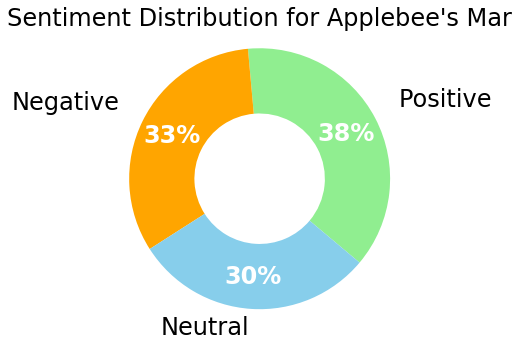

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = app_mar.Sentiment.value_counts()
labels = sentiment_counts.index

#color_palette_list = ['lightgreen', 'orange', 'skyblue']
color_palette_list = ['lightgreen', 'orange' , 'skyblue' ]

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Applebee's Mar", y=.95, fontsize = 24)

plt.show()

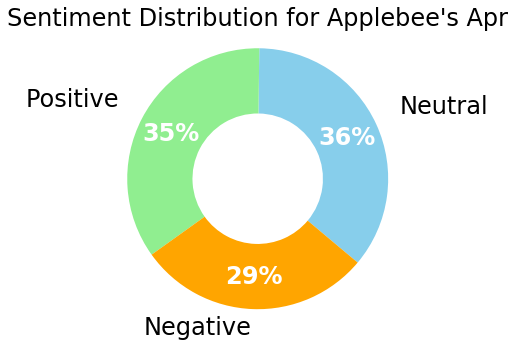

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = app_apr.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['skyblue', 'lightgreen', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Applebee's Apr", y=.95, fontsize = 24)

plt.show()

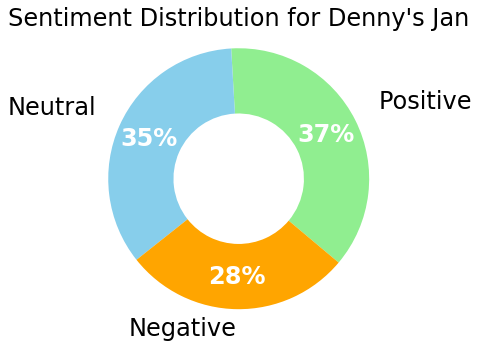

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = den_jan.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen', 'skyblue', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Denny's Jan", y=.95, fontsize = 24)

plt.show()

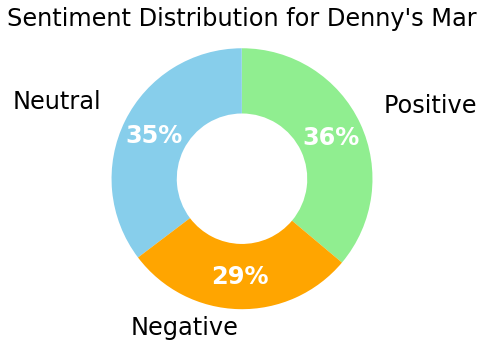

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = den_mar.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen', 'skyblue', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Denny's Mar", y=.95, fontsize = 24)

plt.show()

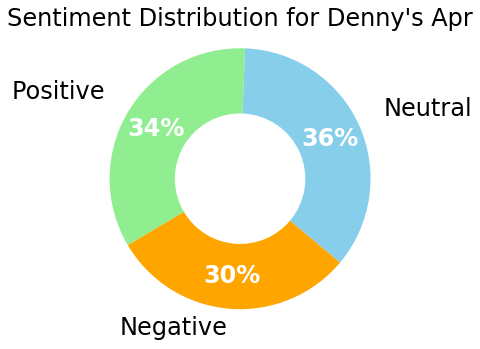

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = den_apr.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['skyblue', 'lightgreen', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Denny's Apr", y=.95, fontsize = 24)

plt.show()

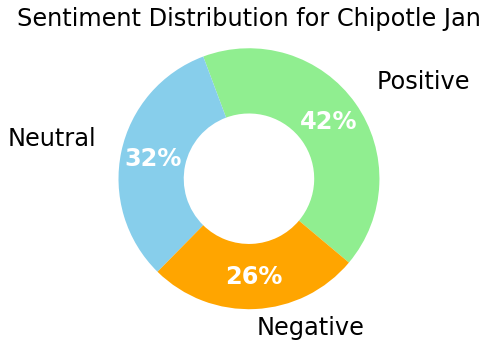

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = chi_jan.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen', 'skyblue', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Chipotle Jan", y=.95, fontsize = 24)

plt.show()

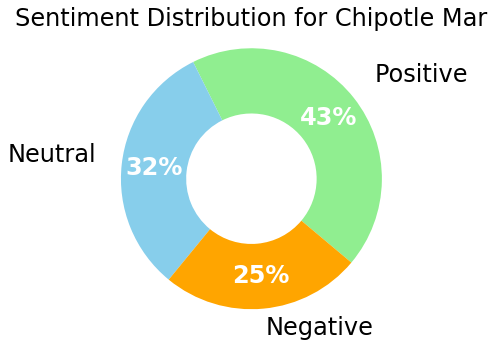

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = chi_mar.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen', 'skyblue', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Chipotle Mar", y=.95, fontsize = 24)

plt.show()

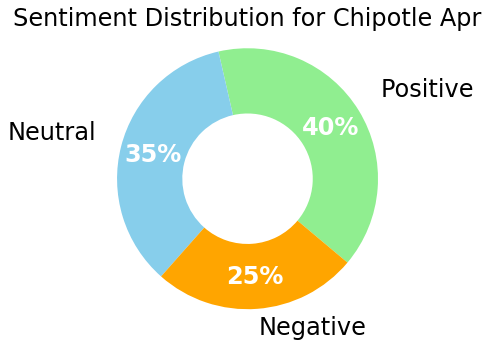

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = chi_apr.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen','skyblue' , 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Chipotle Apr", y=.95, fontsize = 24)

plt.show()

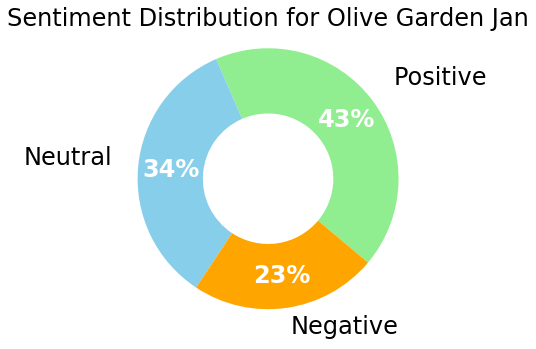

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = oli_jan.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen', 'skyblue', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Olive Garden Jan", y=.95, fontsize = 24)

plt.show()

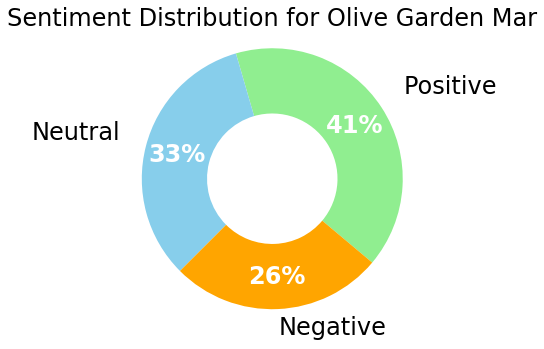

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = oli_mar.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['lightgreen', 'skyblue', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Olive Garden Mar", y=.95, fontsize = 24)

plt.show()

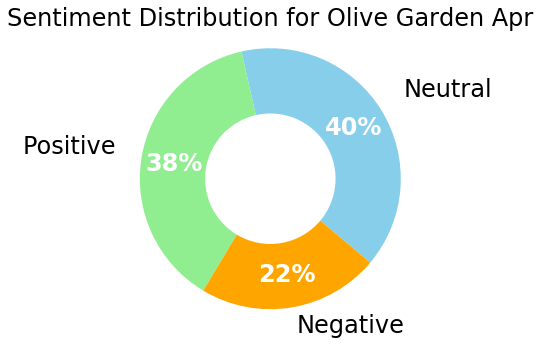

In [0]:
plt.rcParams['font.size']=24
fig, ax = plt.subplots(figsize=(9, 6), subplot_kw=dict(aspect="equal"))
sentiment_counts = oli_apr.Sentiment.value_counts()
labels = sentiment_counts.index

color_palette_list = ['skyblue', 'lightgreen', 'orange']

wedges, texts, autotexts = ax.pie(sentiment_counts, wedgeprops=dict(width=0.5), startangle=-40,  
       colors=color_palette_list[0:3], autopct='%1.0f%%', pctdistance=.75, textprops={'color':"w", 'weight':'bold'})

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    ax.annotate(labels[i], xy=(x, y), xytext=(1.2*x, 1.2*y),
                horizontalalignment=horizontalalignment)
ax.set_title("Sentiment Distribution for Olive Garden Apr", y=.95, fontsize = 24)

plt.show()

In [0]:
ScrapeQueries = ["Applebee's", "Chipotle", "Denny's", "Olive Garden"]
app_jan['query_text'] = "Applebee's"
chi_jan['query_text'] = "Chipotle"
den_jan['query_text'] = "Denny's"
oli_jan['query_text'] = "Olive Garden"
app_mar['query_text'] = "Applebee's"
chi_mar['query_text'] = "Chipotle"
den_mar['query_text'] = "Denny's"
oli_mar['query_text'] = "Olive Garden"
app_apr['query_text'] = "Applebee's"
chi_apr['query_text'] = "Chipotle"
den_apr['query_text'] = "Denny's"
oli_apr['query_text'] = "Olive Garden"
frames = [app_jan, chi_jan, den_jan, oli_jan]
frames3 = [app_mar, chi_mar, den_mar, oli_mar]
frames4 = [app_apr, chi_apr, den_apr, oli_apr]
ScrapeResults_jan = pd.concat(frames)
ScrapeResults_mar = pd.concat(frames3)
ScrapeResults_apr = pd.concat(frames4)

**COMPARATIVE ANALYSIS**

- To compared the perceptions of different firms we created bar charts.
- These charts allow quick height comparisons for firms' proportion of positive sentiment, and proportion of non-negative sentiments.

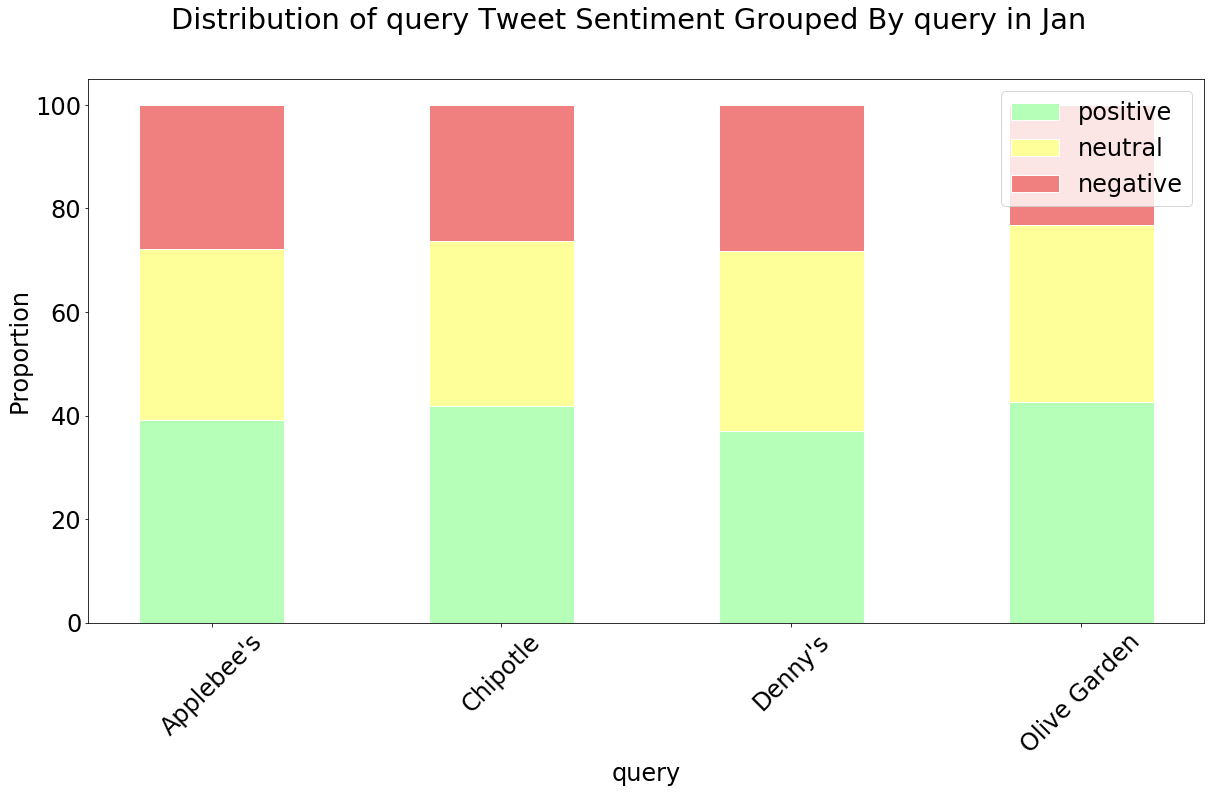

In [0]:
# sentiment distribution of companies
import matplotlib.pyplot as plt
r = range(len(ScrapeQueries))
sentiments = ["positive", "neutral", "negative"]

plt.figure(figsize=[20, 10])

positiveProps = (ScrapeResults_jan[ScrapeResults_jan.Sentiment == 'Positive'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_jan.groupby(['query_text']).count()[['Sentiment']])*100
neutralProps = (ScrapeResults_jan[ScrapeResults_jan.Sentiment == 'Neutral'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_jan.groupby(['query_text']).count()[['Sentiment']])*100
negativeProps = (ScrapeResults_jan[ScrapeResults_jan.Sentiment == 'Negative'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_jan.groupby(['query_text']).count()[['Sentiment']])*100

positiveProps = positiveProps['Sentiment'].tolist()
neutralProps = neutralProps['Sentiment'].tolist()
negativeProps = negativeProps['Sentiment'].tolist()

barWidth = 0.5
labels = ScrapeResults_jan.groupby(['query_text']).text.unique().keys()
plt.bar(r, positiveProps, color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps, bottom=positiveProps, color='#FFFF99', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps, bottom=[i+j for i,j in zip(positiveProps, neutralProps)], color='#F08080', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45)
plt.suptitle('Distribution of query Tweet Sentiment Grouped By query in Jan')
plt.xlabel("query")
plt.ylabel("Proportion")
plt.legend(sentiments)
plt.show()


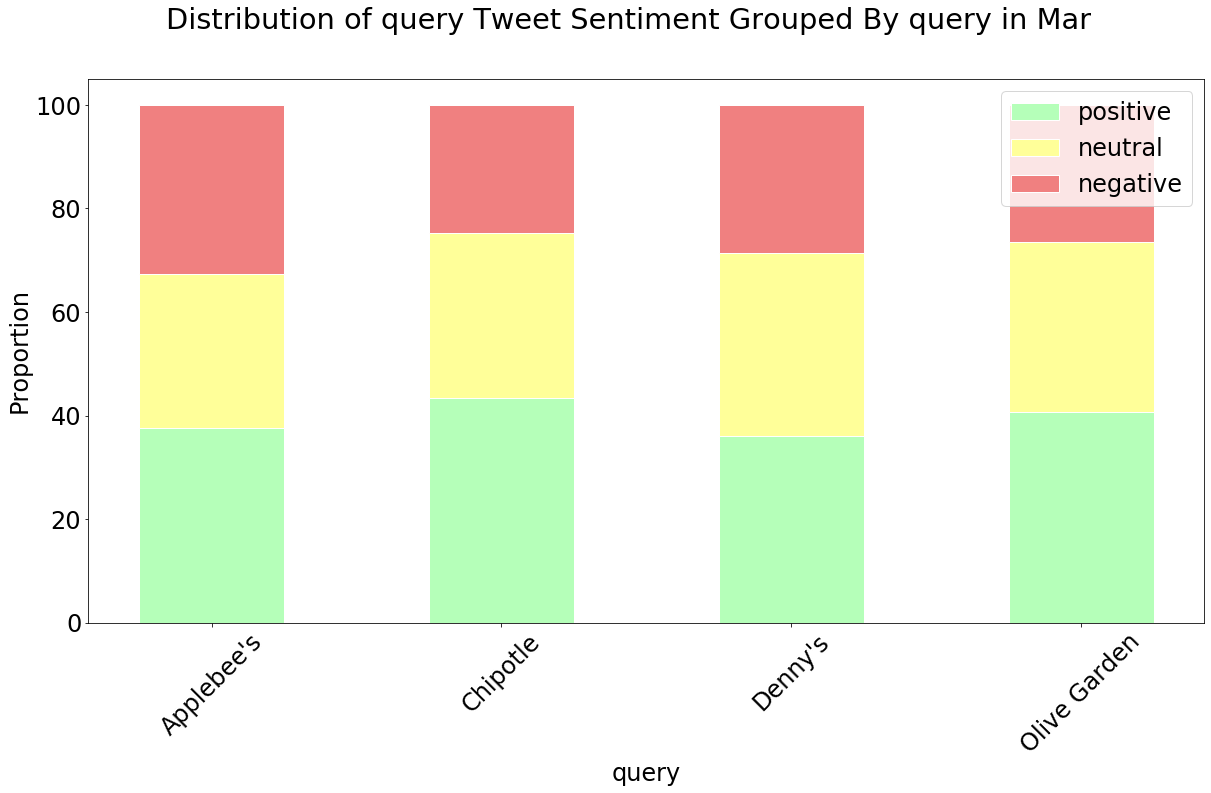

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 10])

positiveProps3 = (ScrapeResults_mar[ScrapeResults_mar.Sentiment == 'Positive'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_mar.groupby(['query_text']).count()[['Sentiment']])*100
neutralProps3 = (ScrapeResults_mar[ScrapeResults_mar.Sentiment == 'Neutral'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_mar.groupby(['query_text']).count()[['Sentiment']])*100
negativeProps3 = (ScrapeResults_mar[ScrapeResults_mar.Sentiment == 'Negative'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_mar.groupby(['query_text']).count()[['Sentiment']])*100

positiveProps3 = positiveProps3['Sentiment'].tolist()
neutralProps3 = neutralProps3['Sentiment'].tolist()
negativeProps3 = negativeProps3['Sentiment'].tolist()

barWidth = 0.5
labels = ScrapeResults_mar.groupby(['query_text']).text.unique().keys()
plt.bar(r, positiveProps3, color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps3, bottom=positiveProps3, color='#FFFF99', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps3, bottom=[i+j for i,j in zip(positiveProps3, neutralProps3)], color='#F08080', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45)
plt.suptitle('Distribution of query Tweet Sentiment Grouped By query in Mar')
plt.xlabel("query")
plt.ylabel("Proportion")
plt.legend(sentiments)
plt.show()


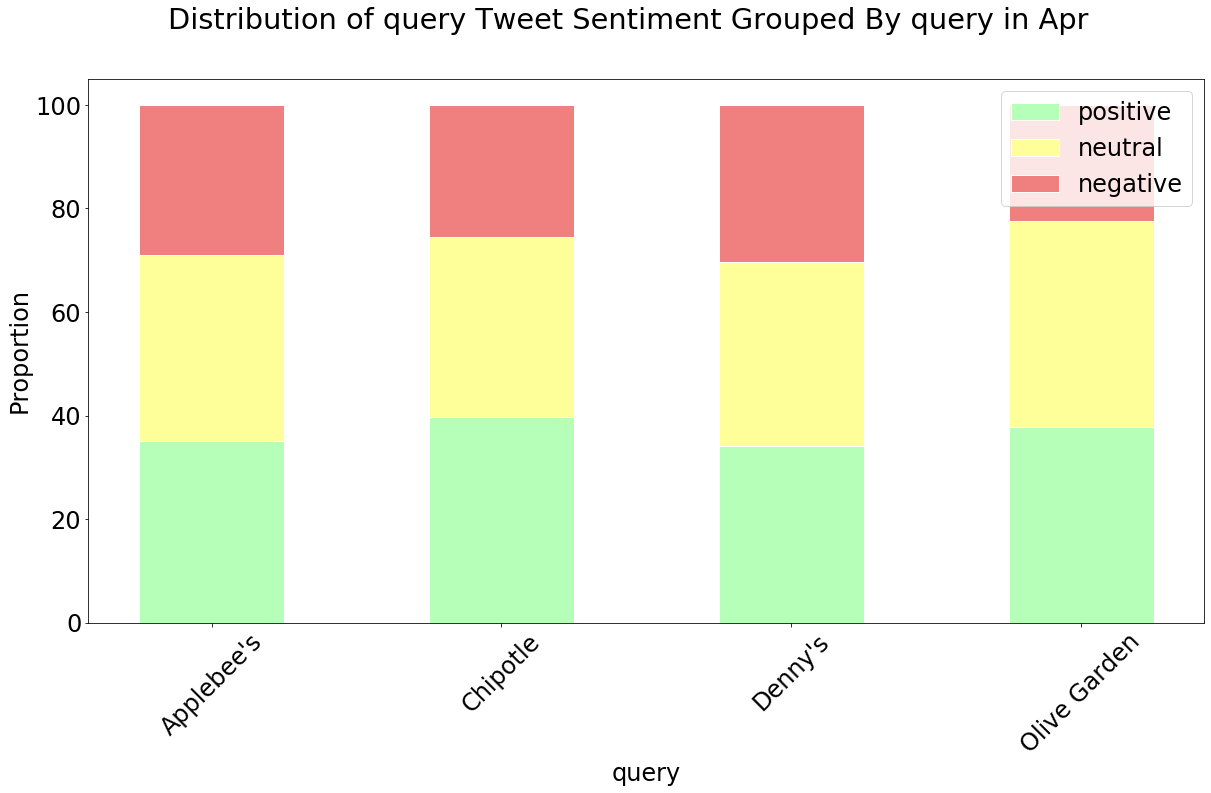

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20, 10])

positiveProps4 = (ScrapeResults_apr[ScrapeResults_apr.Sentiment == 'Positive'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_apr.groupby(['query_text']).count()[['Sentiment']])*100
neutralProps4 = (ScrapeResults_apr[ScrapeResults_apr.Sentiment == 'Neutral'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_apr.groupby(['query_text']).count()[['Sentiment']])*100
negativeProps4 = (ScrapeResults_apr[ScrapeResults_apr.Sentiment == 'Negative'].groupby(['query_text']).count()[['Sentiment']]/ ScrapeResults_apr.groupby(['query_text']).count()[['Sentiment']])*100

positiveProps4 = positiveProps4['Sentiment'].tolist()
neutralProps4 = neutralProps4['Sentiment'].tolist()
negativeProps4 = negativeProps4['Sentiment'].tolist()

barWidth = 0.5
labels = ScrapeResults_apr.groupby(['query_text']).text.unique().keys()
plt.bar(r, positiveProps4, color='#b5ffb9', edgecolor='white', width=barWidth)
plt.bar(r, neutralProps4, bottom=positiveProps4, color='#FFFF99', edgecolor='white', width=barWidth)
plt.bar(r, negativeProps4, bottom=[i+j for i,j in zip(positiveProps4, neutralProps4)], color='#F08080', edgecolor='white', width=barWidth)
 
plt.xticks(r, labels, rotation = 45)
plt.suptitle('Distribution of query Tweet Sentiment Grouped By query in Apr')
plt.xlabel("query")
plt.ylabel("Proportion")
plt.legend(sentiments)
plt.show()

**WORD ANALYSIS**

- To get a better idea of the specific tweets driving positive and negative sentiment, we found the 20 most common words in each data set.

- We used regular expressions to remove all non-words from the tweet texts.
- We also removed stopwords.

- Given this cleaned text, we split the resulting text to produce a list of words, then ran a counter on these lists to produce the 20 most common words.


In [0]:
import string
def clean_tweet(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [0]:
app_jan['tidy_text'] = app_jan['text'].apply(lambda x:clean_tweet(x))
app_mar['tidy_text'] = app_mar['text'].apply(lambda x:clean_tweet(x))
app_apr['tidy_text'] = app_apr['text'].apply(lambda x:clean_tweet(x))
chi_jan['tidy_text'] = chi_jan['text'].apply(lambda x:clean_tweet(x))
chi_mar['tidy_text'] = chi_mar['text'].apply(lambda x:clean_tweet(x))
chi_apr['tidy_text'] = chi_apr['text'].apply(lambda x:clean_tweet(x))
den_jan['tidy_text'] = den_jan['text'].apply(lambda x:clean_tweet(x))
den_mar['tidy_text'] = den_mar['text'].apply(lambda x:clean_tweet(x))
den_apr['tidy_text'] = den_apr['text'].apply(lambda x:clean_tweet(x))
oli_jan['tidy_text'] = oli_jan['text'].apply(lambda x:clean_tweet(x))
oli_mar['tidy_text'] = oli_mar['text'].apply(lambda x:clean_tweet(x))
oli_apr['tidy_text'] = oli_apr['text'].apply(lambda x:clean_tweet(x))

In [0]:
def remove_stopword(x):
    return [t for t in x if t not in stopwords.words('english')]

In [0]:
# Step 4: find the top 20 most common words in tweets; 1 for each dataset; in total there are 12

In [0]:
app_jan.head()


Unnamed: 0            timestamp  \
3851  3851        2020-01-10 17:52:21   
4618  4618        2020-01-02 00:39:59   
4143  4143        2020-01-02 21:21:12   
2099  2099        2020-01-14 22:45:25   
2438  2438        2020-01-14 04:14:02   

                                           username     screen_name  \
3851  Matthew Hyatt                                  hyattlikehotel   
4618  jessi ✨✨                                       jessntra         
4143  Lincoln Duncan is my name, here's my song🌊🇺🇸💯  pawdebb          
2099  🖤🤘🏼 𝗗’𝘆𝗮 𝗹𝗶𝗸𝗲 𝗯𝗮𝘀𝘀? ✨💞                         basshead_babie   
2438  Skyler Burkardt                                BurkardtSkyler   

                 user_id             tweet_id  \
3851  977677554743209984  1215692870222479360   
4618  19425755            1212533965996859393   
4143  443428247           1212846326582517760   
2099  427981403           1217216176184385536   
2438  946982665726566402  1216936487477841921   

                                                                                                                                                                                                   text  \
3851  Wouldn't eat AB if my life depended on it. Lol.                                                                                                                                                     
4618  @Applebees decided to chance it. Ordered a medium steak. This isn't medium. Asked for a new one and was told it would be a while because the kitchen is backed up. Wtf pic.twitter.com/9MgdfdyWhh   
4143  bookmarked..thanks                                                                                                                                                                                  
2099  Craigery!! 😳 sir this is an applebees                                                                                                                                                               
2438  More options                                                                                                                                                                                        

      likes  replies  retweets                                   tweet_url  \
3851  0      0        0         /hyattlikehotel/status/1215692870222479360   
4618  0      2        0         /jessntra/status/1212533965996859393         
4143  1      0        0         /pawdebb/status/1212846326582517760          
2099  1      0        0         /basshead_babie/status/1217216176184385536   
2438  0      0        0         /BurkardtSkyler/status/1216936487477841921   

      parent_tweet_id  \
3851  1.214242e+18      
4618 NaN                
4143  1.212839e+18      
2099  1.216928e+18      
2438  1.216766e+18      

                                                                                                                                                                    stripped  \
3851  Wouldn't eat AB if my life depended on it. Lol.                                                                                                                          
4618  Applebees decided to chance it. Ordered a medium steak. This isn't medium. Asked for a new one and was told it would be a while because the kitchen is backed up. Wtf    
4143  bookmarked..thanks                                                                                                                                                       
2099  Craigery!! 😳 sir this is an applebees                                                                                                                                    
2438  More options                                                                                                                                                             

      C_Score Sentiment  query_text  \
3851  0.4215   Positive  Applebee's   
4618 -0.4019   Negative  Applebee's   
4143  0.0000   Neutral  

In [0]:
from collections import Counter
from nltk.corpus import stopwords

app_jan['list'] = app_jan['tidy_text'].apply(lambda x:str(x).split())
app_jan['list'] = app_jan['list'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in app_jan['list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [0]:
!pip install plotly
import plotly.express as px

fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

app_mar['list'] = app_mar['tidy_text'].apply(lambda x:str(x).split())
app_mar['list'] = app_mar['list'].apply(lambda x:remove_stopword(x))
top1 = Counter([item for sublist in app_mar['list'] for item in sublist])
temp1 = pd.DataFrame(top1.most_common(20))
temp1.columns = ['Common_words','count']
temp1.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig1 = px.bar(temp1, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig1.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

app_apr['list'] = app_apr['tidy_text'].apply(lambda x:str(x).split())
app_apr['list'] = app_apr['list'].apply(lambda x:remove_stopword(x))
top2 = Counter([item for sublist in app_apr['list'] for item in sublist])
temp2 = pd.DataFrame(top2.most_common(20))
temp2.columns = ['Common_words','count']
temp2.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig2 = px.bar(temp2, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig2.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

chi_jan['list'] = chi_jan['tidy_text'].apply(lambda x:str(x).split())
chi_jan['list'] = chi_jan['list'].apply(lambda x:remove_stopword(x))
top3 = Counter([item for sublist in chi_jan['list'] for item in sublist])
temp3 = pd.DataFrame(top3.most_common(20))
temp3.columns = ['Common_words','count']
temp3.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig3 = px.bar(temp3, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig3.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

chi_mar['list'] = chi_mar['tidy_text'].apply(lambda x:str(x).split())
chi_mar['list'] = chi_mar['list'].apply(lambda x:remove_stopword(x))
top4 = Counter([item for sublist in chi_mar['list'] for item in sublist])
temp4 = pd.DataFrame(top4.most_common(20))
temp4.columns = ['Common_words','count']
temp4.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig4 = px.bar(temp4, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig4.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

chi_apr['list'] = chi_apr['tidy_text'].apply(lambda x:str(x).split())
chi_apr['list'] = chi_apr['list'].apply(lambda x:remove_stopword(x))
top5 = Counter([item for sublist in chi_apr['list'] for item in sublist])
temp5 = pd.DataFrame(top5.most_common(20))
temp5.columns = ['Common_words','count']
temp5.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig5 = px.bar(temp5, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig5.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

den_jan['list'] = den_jan['tidy_text'].apply(lambda x:str(x).split())
den_jan['list'] = den_jan['list'].apply(lambda x:remove_stopword(x))
top6 = Counter([item for sublist in den_jan['list'] for item in sublist])
temp6 = pd.DataFrame(top6.most_common(20))
temp6.columns = ['Common_words','count']
temp6.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig6 = px.bar(temp6, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig6.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

den_mar['list'] = den_mar['tidy_text'].apply(lambda x:str(x).split())
den_mar['list'] = den_mar['list'].apply(lambda x:remove_stopword(x))
top7 = Counter([item for sublist in den_mar['list'] for item in sublist])
temp7 = pd.DataFrame(top7.most_common(20))
temp7.columns = ['Common_words','count']
temp7.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig7 = px.bar(temp7, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig7.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

den_apr['list'] = den_apr['tidy_text'].apply(lambda x:str(x).split())
den_apr['list'] = den_apr['list'].apply(lambda x:remove_stopword(x))
top8 = Counter([item for sublist in den_apr['list'] for item in sublist])
temp8 = pd.DataFrame(top8.most_common(20))
temp8.columns = ['Common_words','count']
temp8.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig8 = px.bar(temp8, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig8.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

oli_jan['list'] = oli_jan['tidy_text'].apply(lambda x:str(x).split())
oli_jan['list'] = oli_jan['list'].apply(lambda x:remove_stopword(x))
top9 = Counter([item for sublist in oli_jan['list'] for item in sublist])
temp9 = pd.DataFrame(top9.most_common(20))
temp9.columns = ['Common_words','count']
temp9.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig9 = px.bar(temp9, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig9.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

oli_mar['list'] = oli_mar['tidy_text'].apply(lambda x:str(x).split())
oli_mar['list'] = oli_mar['list'].apply(lambda x:remove_stopword(x))
top10 = Counter([item for sublist in oli_mar['list'] for item in sublist])
temp10 = pd.DataFrame(top10.most_common(20))
temp10.columns = ['Common_words','count']
temp10.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig10 = px.bar(temp10, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig10.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

oli_apr['list'] = oli_apr['tidy_text'].apply(lambda x:str(x).split())
oli_apr['list'] = oli_apr['list'].apply(lambda x:remove_stopword(x))
top11 = Counter([item for sublist in oli_apr['list'] for item in sublist])
temp11 = pd.DataFrame(top11.most_common(20))
temp11.columns = ['Common_words','count']
temp11.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig11 = px.bar(temp11, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig11.show()

In [0]:
# subset data based on sentiment

app_jan_pos = app_jan[app_jan['Sentiment']=='Positive']
app_jan_neg = app_jan[app_jan['Sentiment']=='Negative']
app_jan_neu = app_jan[app_jan['Sentiment']=='Neutral']
app_mar_pos = app_mar[app_mar['Sentiment']=='Positive']
app_mar_neg = app_mar[app_mar['Sentiment']=='Negative']
app_mar_neu = app_mar[app_mar['Sentiment']=='Neutral']
app_apr_pos = app_apr[app_apr['Sentiment']=='Positive']
app_apr_neg = app_apr[app_apr['Sentiment']=='Negative']
app_apr_neu = app_apr[app_apr['Sentiment']=='Neutral']

chi_jan_pos = chi_jan[chi_jan['Sentiment']=='Positive']
chi_jan_neg = chi_jan[chi_jan['Sentiment']=='Negative']
chi_jan_neu = chi_jan[chi_jan['Sentiment']=='Neutral']
chi_mar_pos = chi_mar[chi_mar['Sentiment']=='Positive']
chi_mar_neg = chi_mar[chi_mar['Sentiment']=='Negative']
chi_mar_neu = chi_mar[chi_mar['Sentiment']=='Neutral']
chi_apr_pos = chi_apr[chi_apr['Sentiment']=='Positive']
chi_apr_neg = chi_apr[chi_apr['Sentiment']=='Negative']
chi_apr_neu = chi_apr[chi_apr['Sentiment']=='Neutral']

den_jan_pos = den_jan[den_jan['Sentiment']=='Positive']
den_jan_neg = den_jan[den_jan['Sentiment']=='Negative']
den_jan_neu = den_jan[den_jan['Sentiment']=='Neutral']
den_mar_pos = den_mar[den_mar['Sentiment']=='Positive']
den_mar_neg = den_mar[den_mar['Sentiment']=='Negative']
den_mar_neu = den_mar[den_mar['Sentiment']=='Neutral']
den_apr_pos = den_apr[den_apr['Sentiment']=='Positive']
den_apr_neg = den_apr[den_apr['Sentiment']=='Negative']
den_apr_neu = den_apr[den_apr['Sentiment']=='Neutral']

oli_jan_pos = oli_jan[oli_jan['Sentiment']=='Positive']
oli_jan_neg = oli_jan[oli_jan['Sentiment']=='Negative']
oli_jan_neu = oli_jan[oli_jan['Sentiment']=='Neutral']
oli_mar_pos = oli_mar[oli_mar['Sentiment']=='Positive']
oli_mar_neg = oli_mar[oli_mar['Sentiment']=='Negative']
oli_mar_neu = oli_mar[oli_mar['Sentiment']=='Neutral']
oli_apr_pos = oli_apr[oli_apr['Sentiment']=='Positive']
oli_apr_neg = oli_apr[oli_apr['Sentiment']=='Negative']
oli_apr_neu = oli_apr[oli_apr['Sentiment']=='Neutral']

In [0]:
# step 5: find the top 20 most common words in tweets based on sentiment; 
# may not be very useful because the predicted sentiment is not very accurage
# For example, mf, never are identified as positive sentiment

In [0]:
from collections import Counter
from nltk.corpus import stopwords

#app_jan_pos['list'] = app_jan_pos['tidy_text'].apply(lambda x:str(x).split())
#app_jan_pos['list'] = app_jan_pos['list'].apply(lambda x:remove_stopword(x))
top_1 = Counter([item for sublist in app_jan_pos['list'] for item in sublist])
temp_1 = pd.DataFrame(top_1.most_common(20))
temp_1.columns = ['Common_words','count']
temp_1.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig_1 = px.bar(temp_1, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig_1.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

top_2 = Counter([item for sublist in app_jan_neg['list'] for item in sublist])
temp_2 = pd.DataFrame(top_2.most_common(20))
temp_2.columns = ['Common_words','count']
temp_2.style.background_gradient(cmap='Blues')

In [0]:
import plotly.express as px

fig_2 = px.bar(temp_2, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig_2.show()

In [0]:
from collections import Counter
from nltk.corpus import stopwords

top_4 = Counter([item for sublist in chi_jan_pos['list'] for item in sublist])
temp_4 = pd.DataFrame(top_4.most_common(20))
temp_4.columns = ['Common_words','count']
temp_4.style.background_gradient(cmap='Blues')

In [0]:
from collections import Counter
from nltk.corpus import stopwords

top_5 = Counter([item for sublist in chi_jan_neg['list'] for item in sublist])
temp_5 = pd.DataFrame(top_5.most_common(20))
temp_5.columns = ['Common_words','count']
temp_5.style.background_gradient(cmap='Blues')

In [0]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
def wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout() 

In [0]:
# step 5: generate word cloud for each dataset

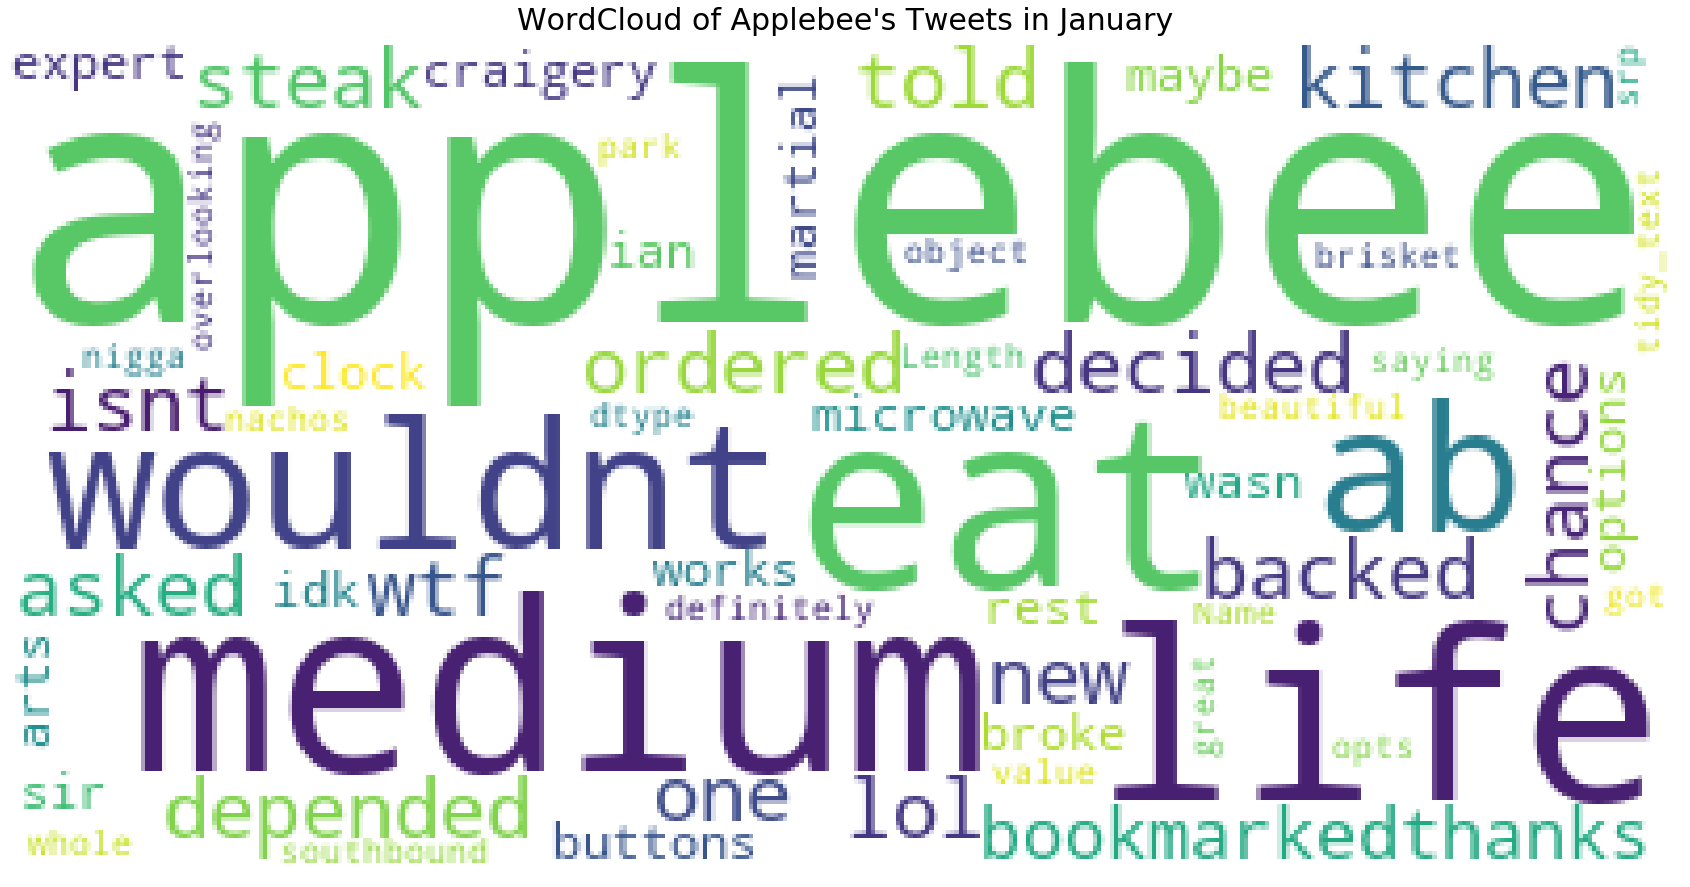

In [0]:
wordcloud(app_jan.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Applebee's Tweets in January")

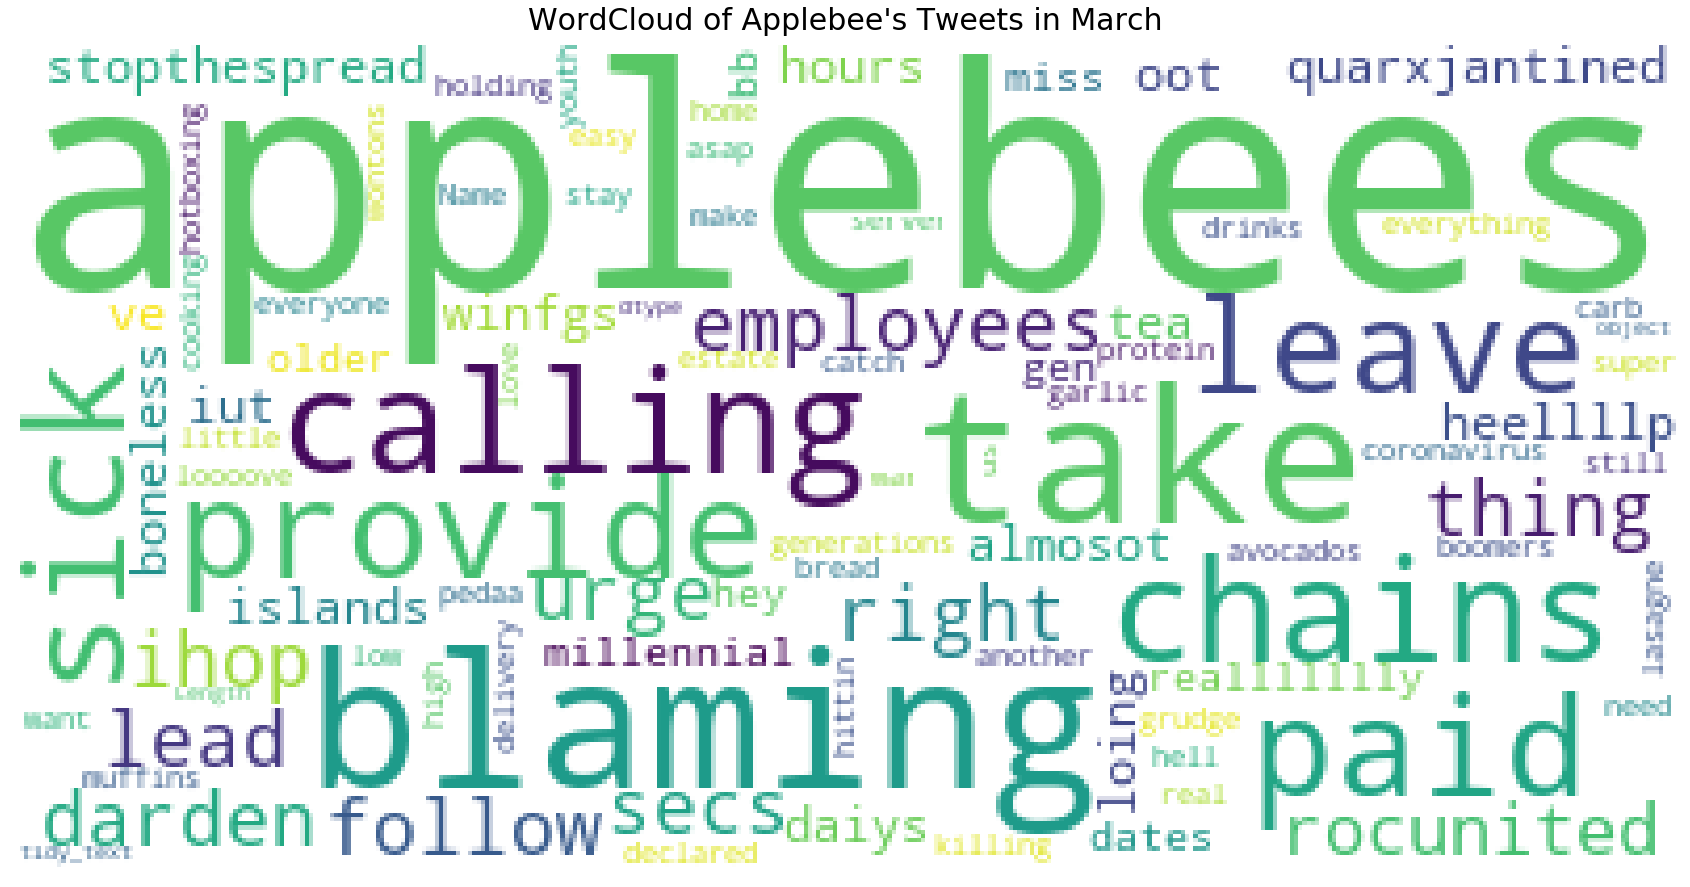

In [0]:
wordcloud(app_mar.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Applebee's Tweets in March")

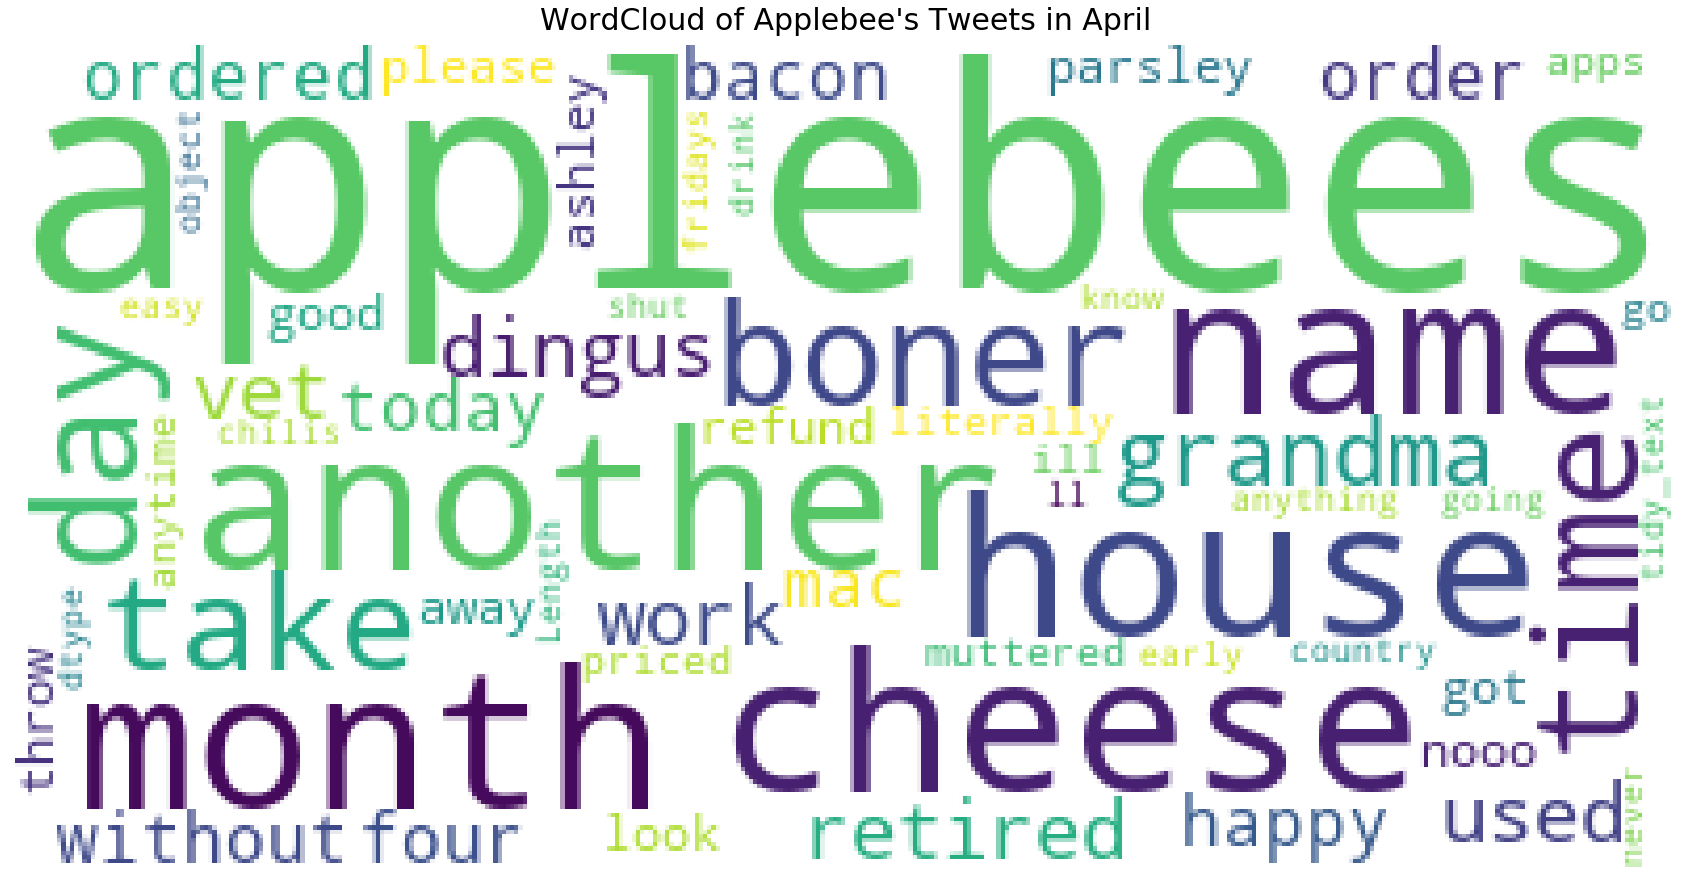

In [0]:
wordcloud(app_apr.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Applebee's Tweets in April")

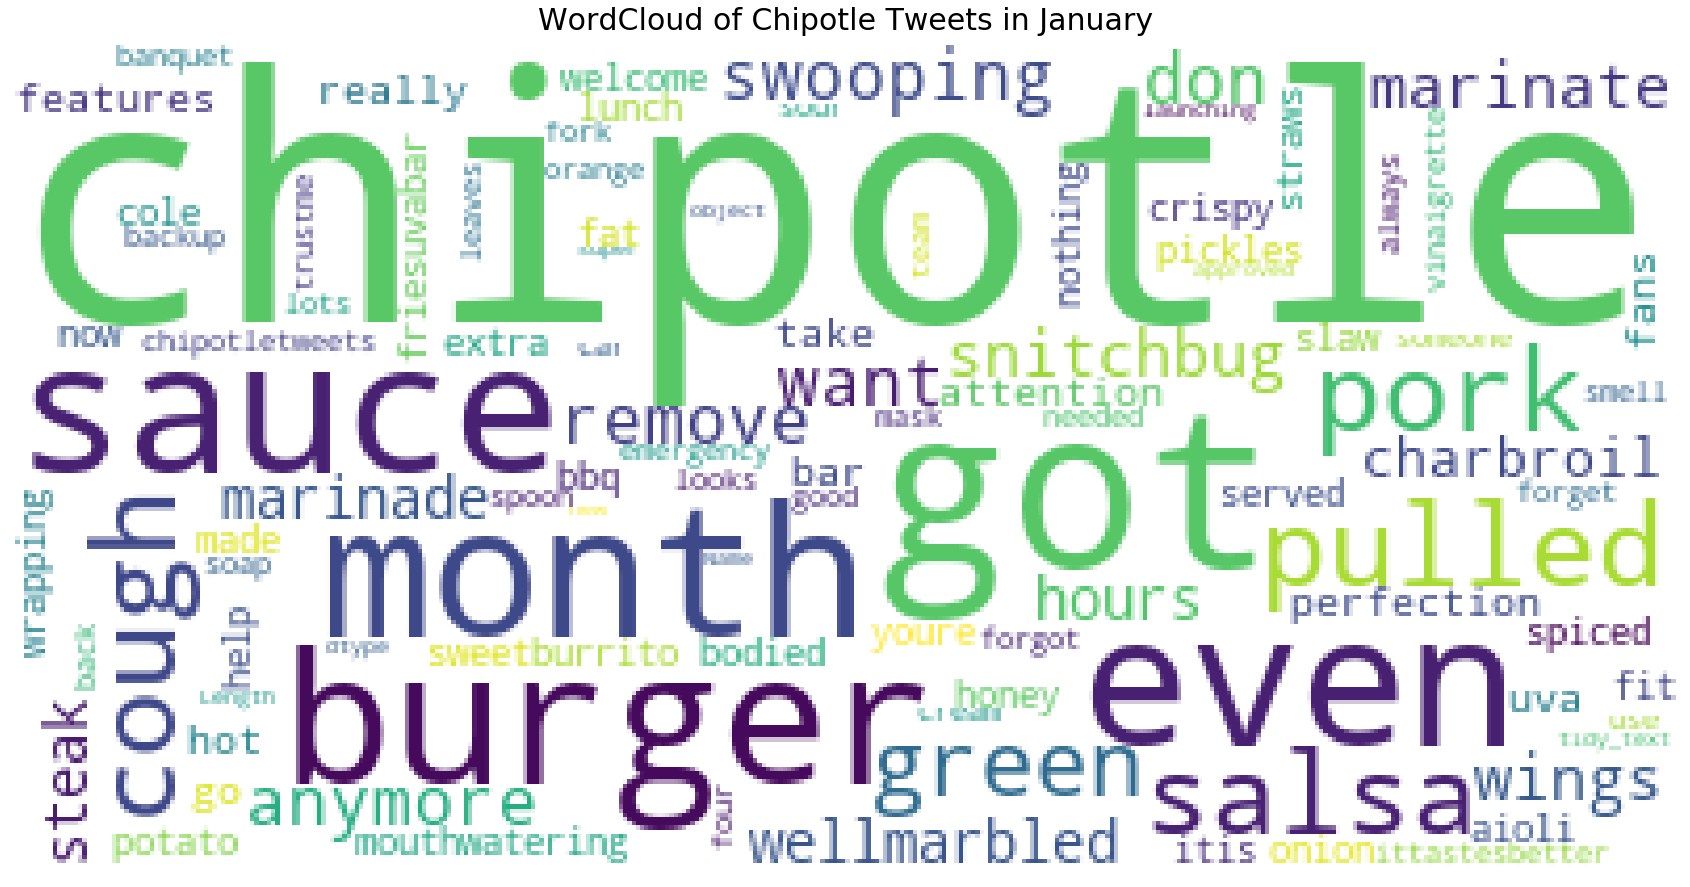

In [0]:
wordcloud(chi_jan.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Chipotle Tweets in January")

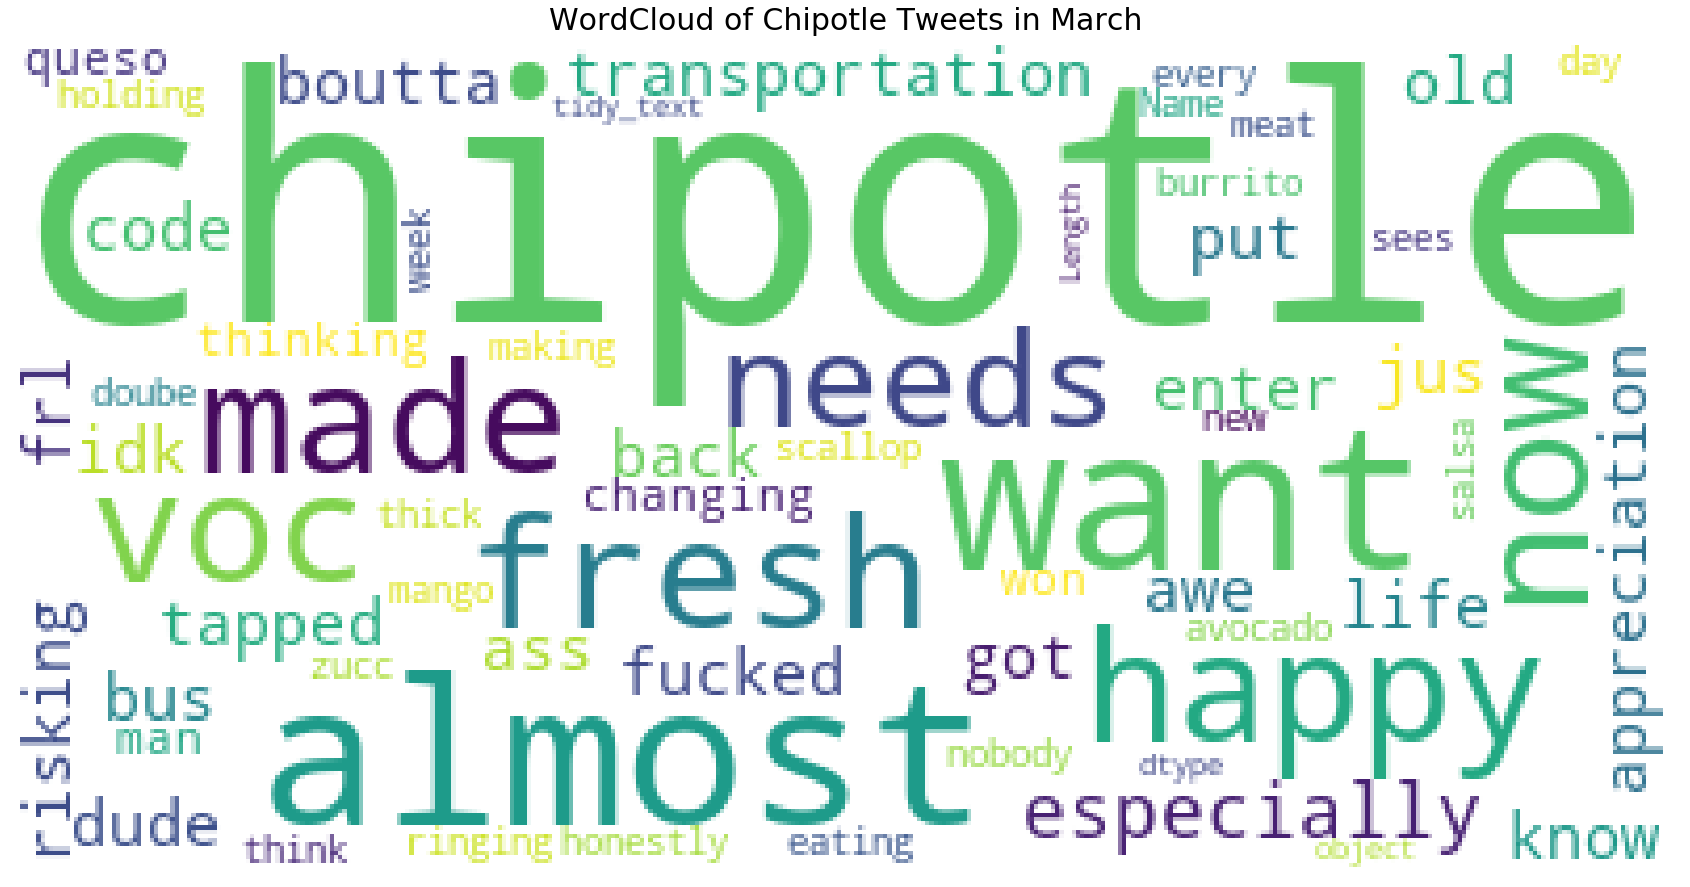

In [0]:
wordcloud(chi_mar.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Chipotle Tweets in March")

In [0]:
wordcloud(chi_apr.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Chipotle Tweets in April")

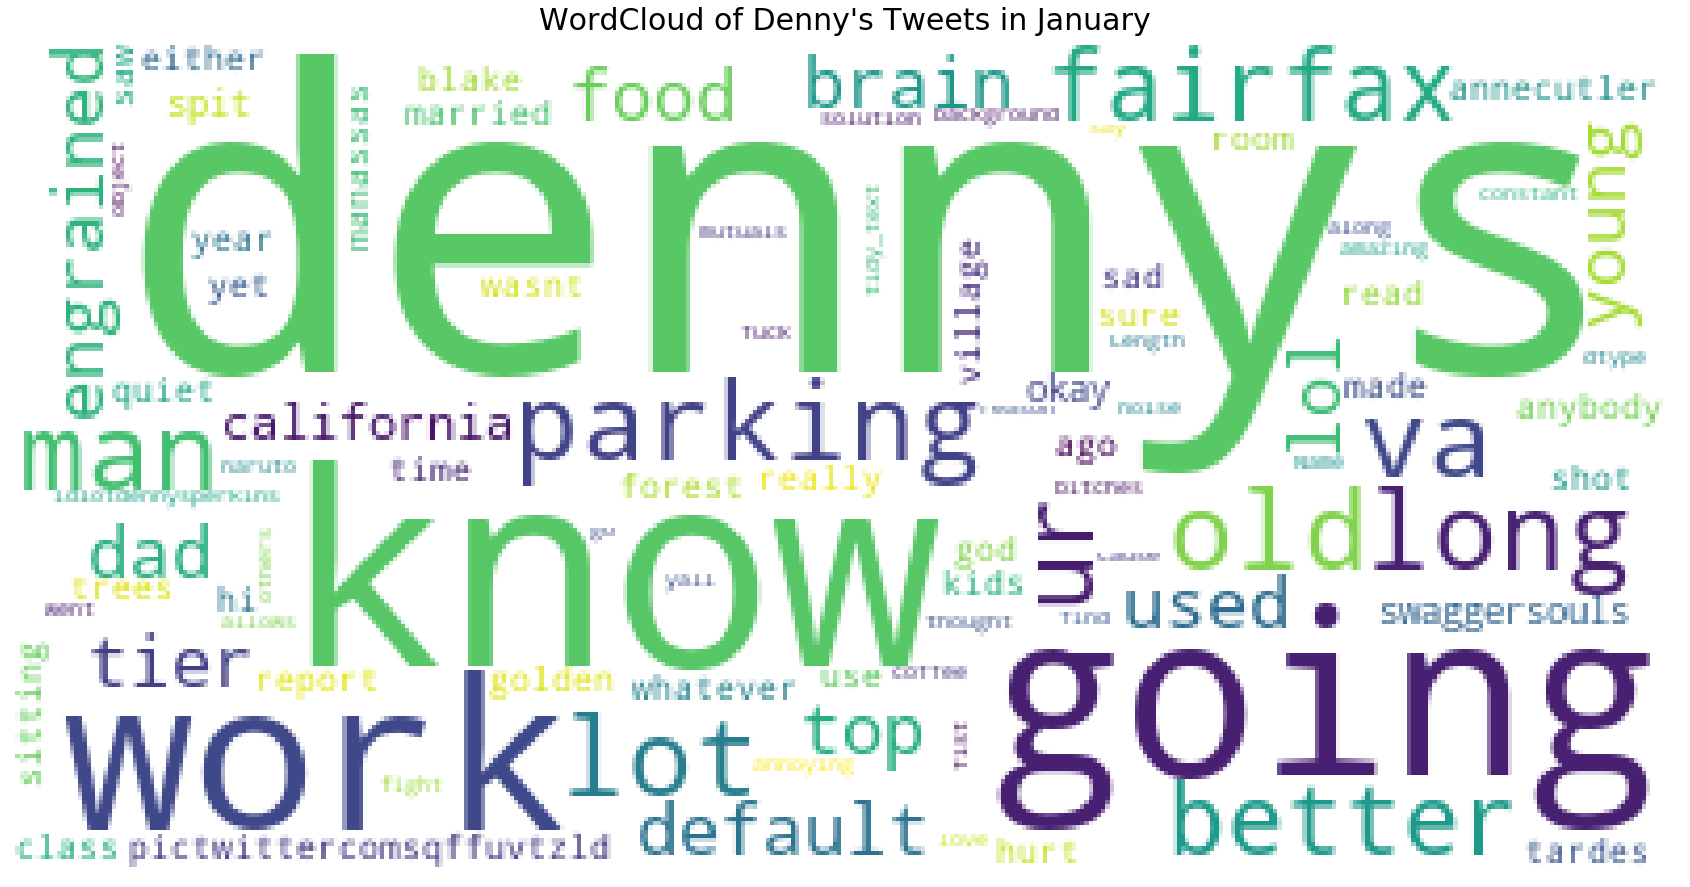

In [0]:
wordcloud(den_jan.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Denny's Tweets in January")

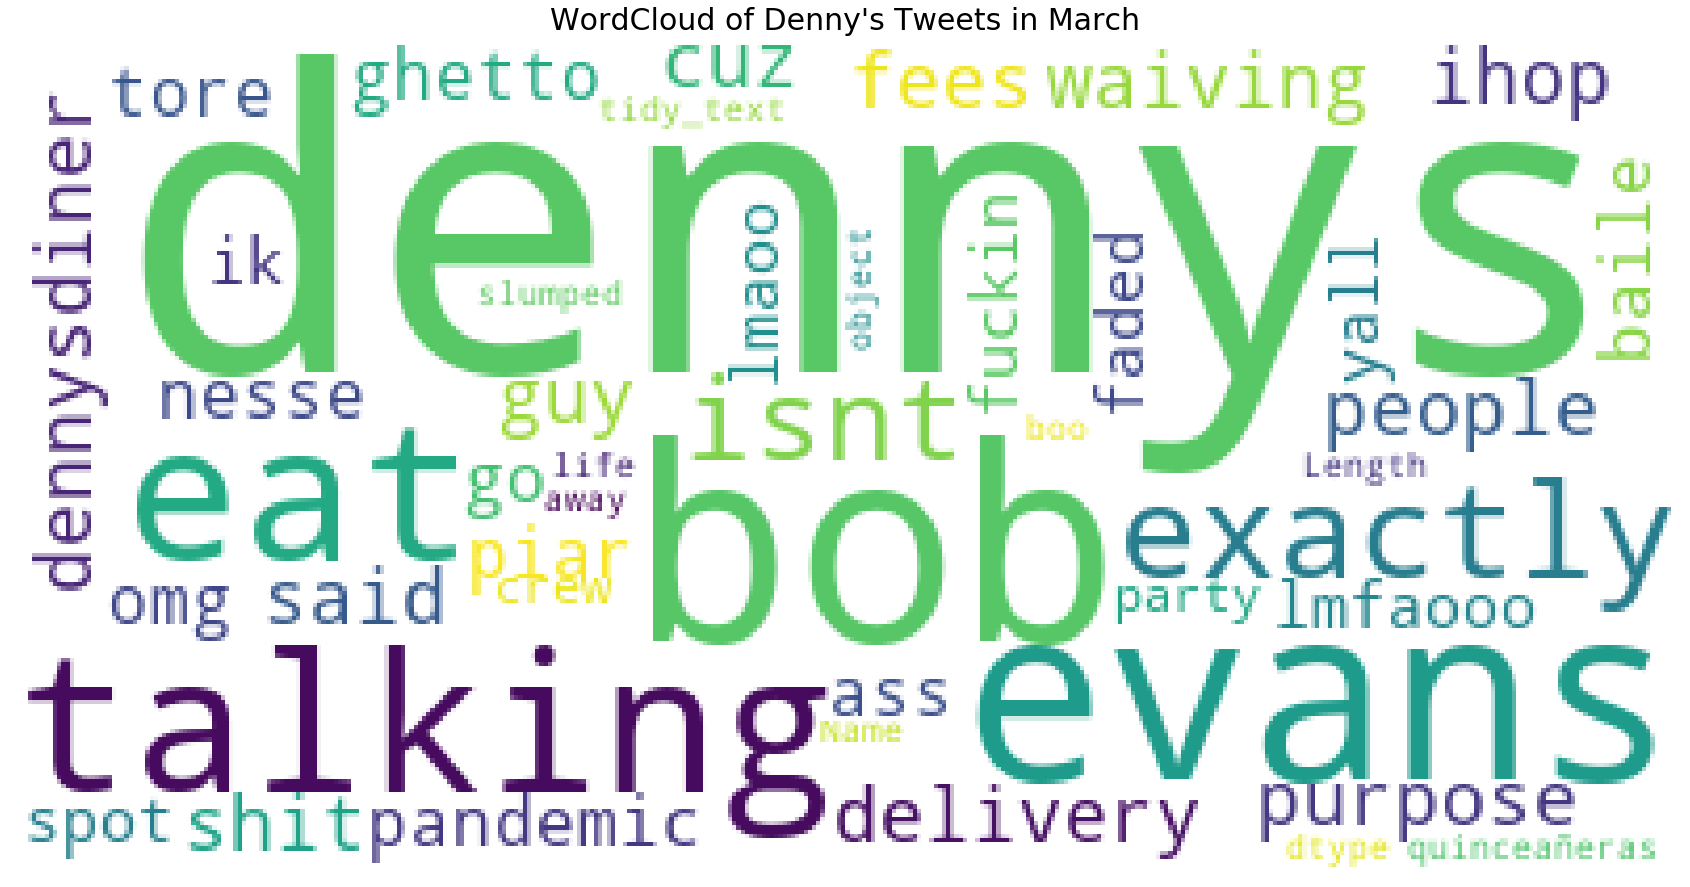

In [0]:
wordcloud(den_mar.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Denny's Tweets in March")

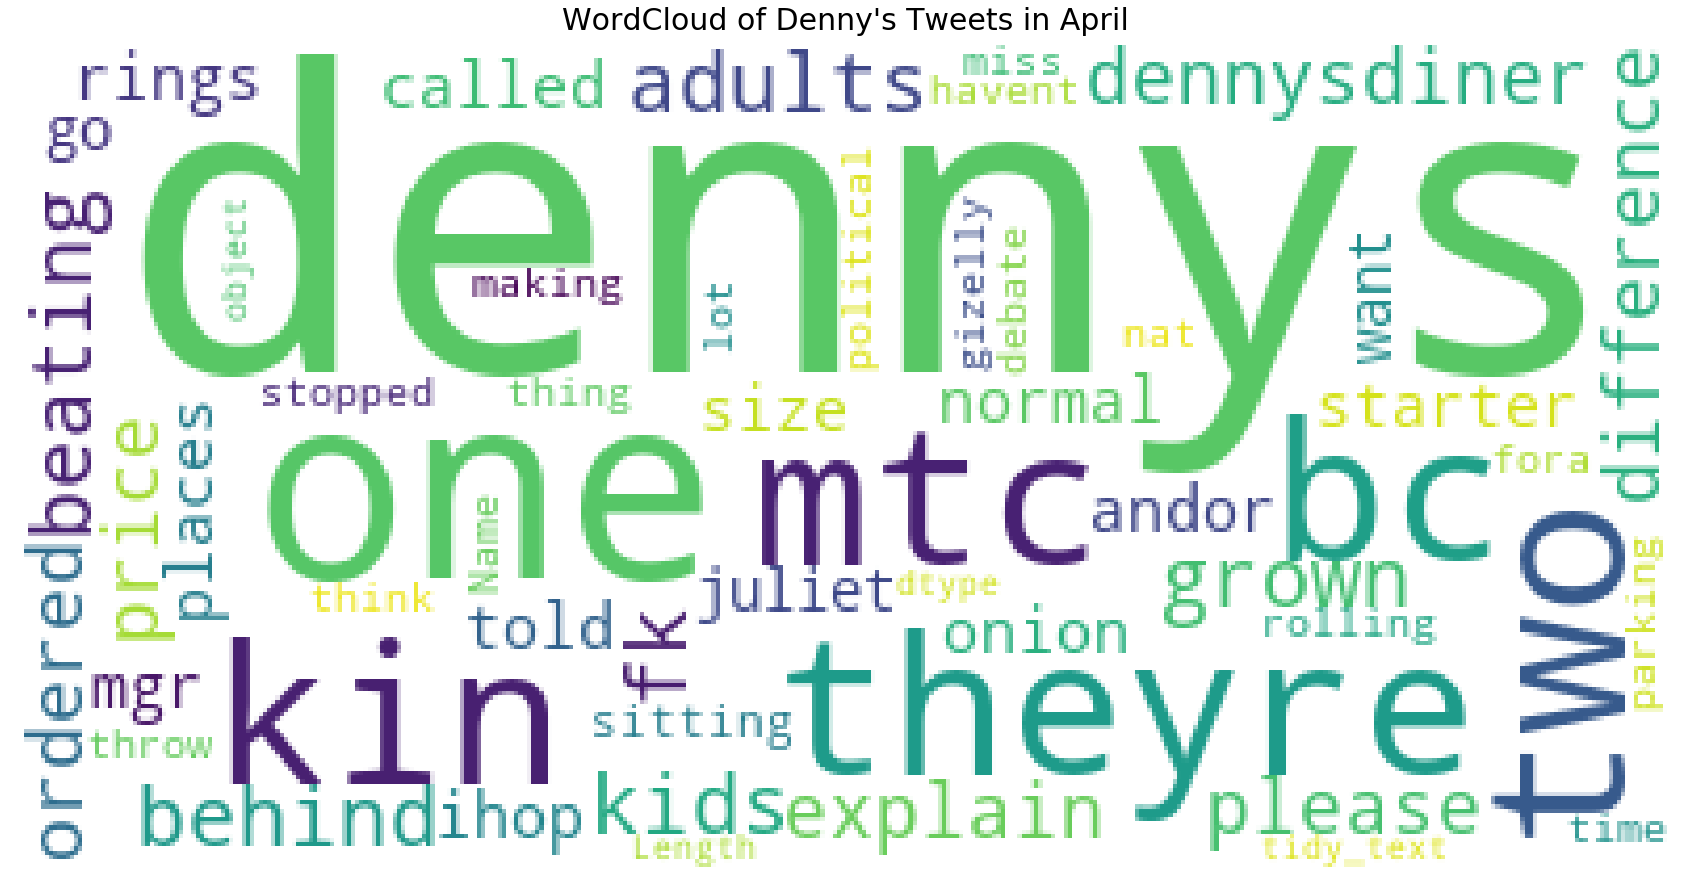

In [0]:
wordcloud(den_apr.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Denny's Tweets in April")

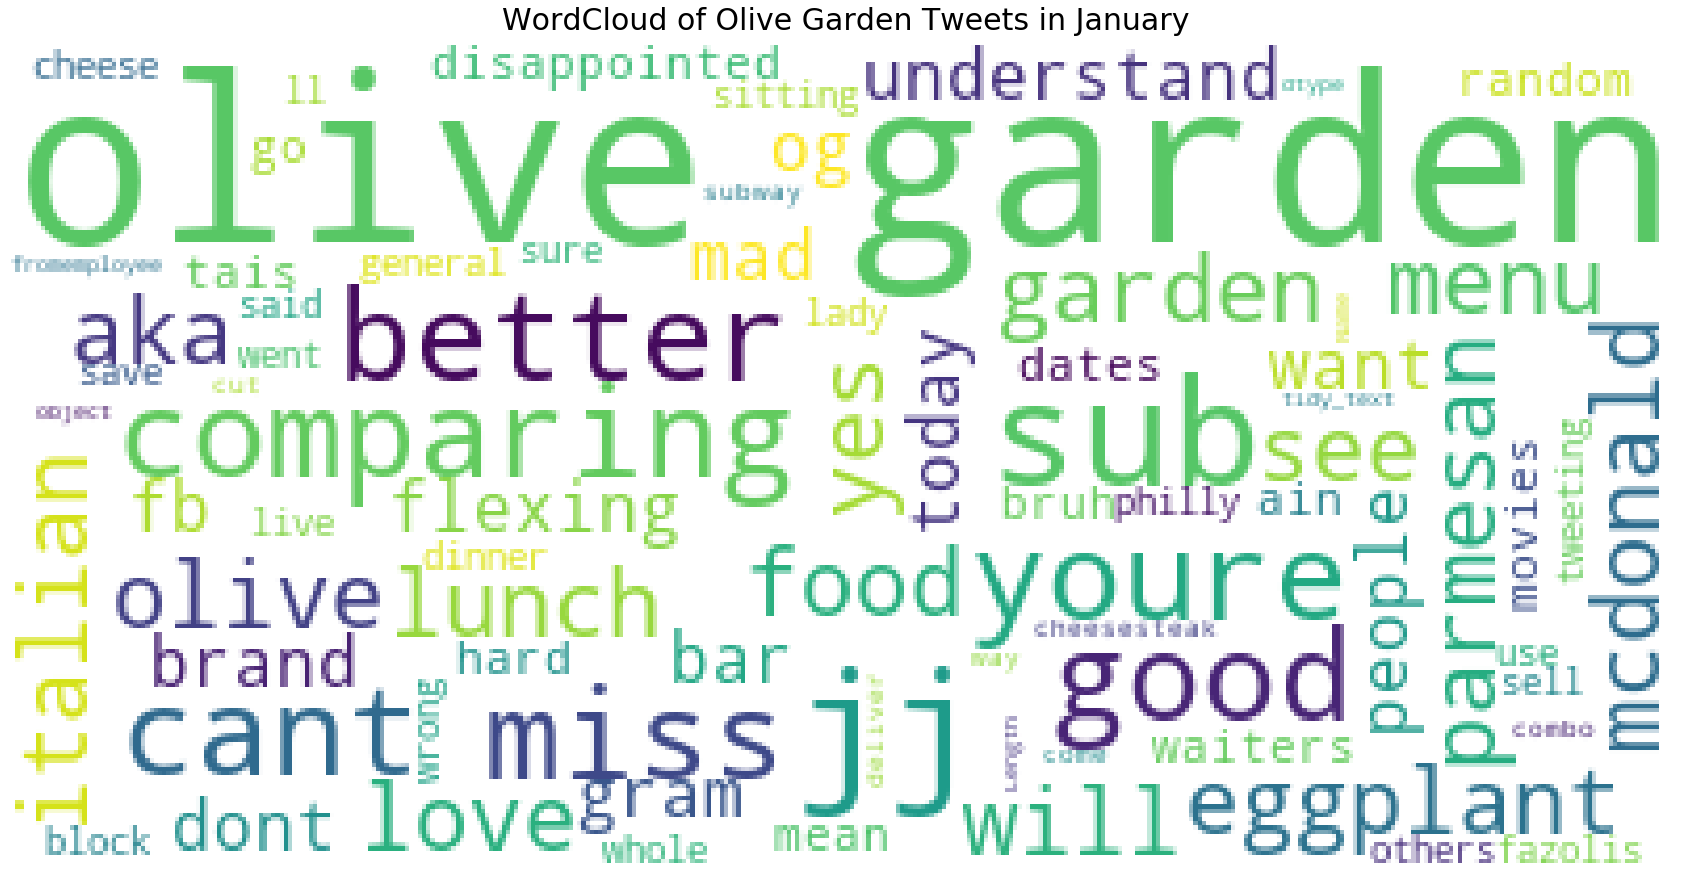

In [0]:
wordcloud(oli_jan.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Tweets in January")

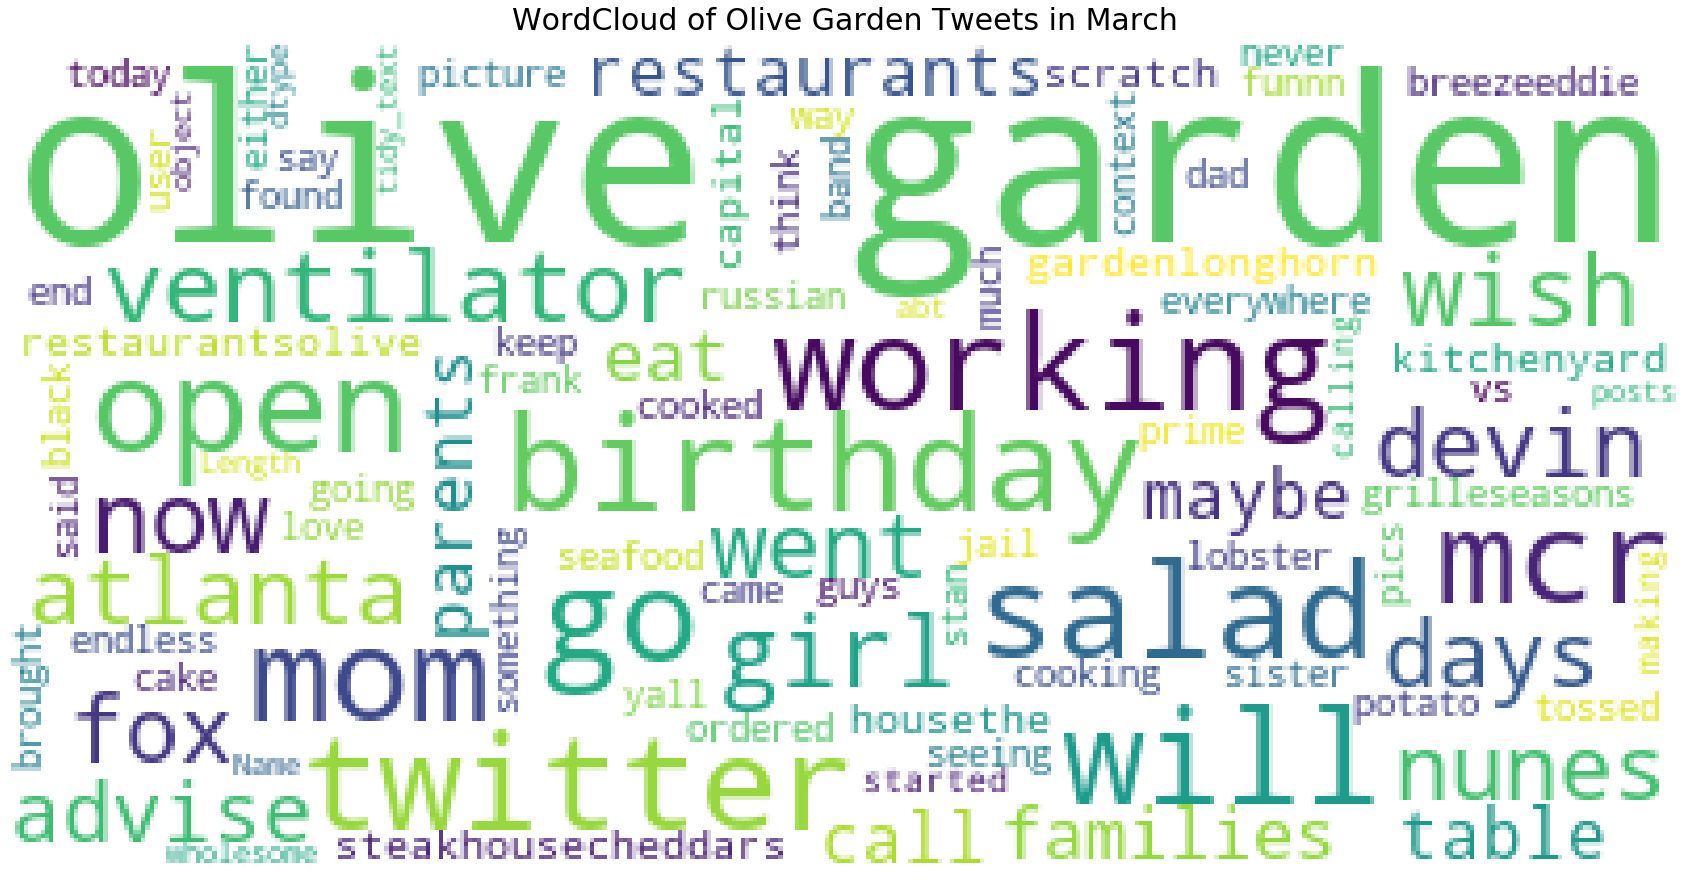

In [0]:
wordcloud(oli_mar.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Tweets in March")

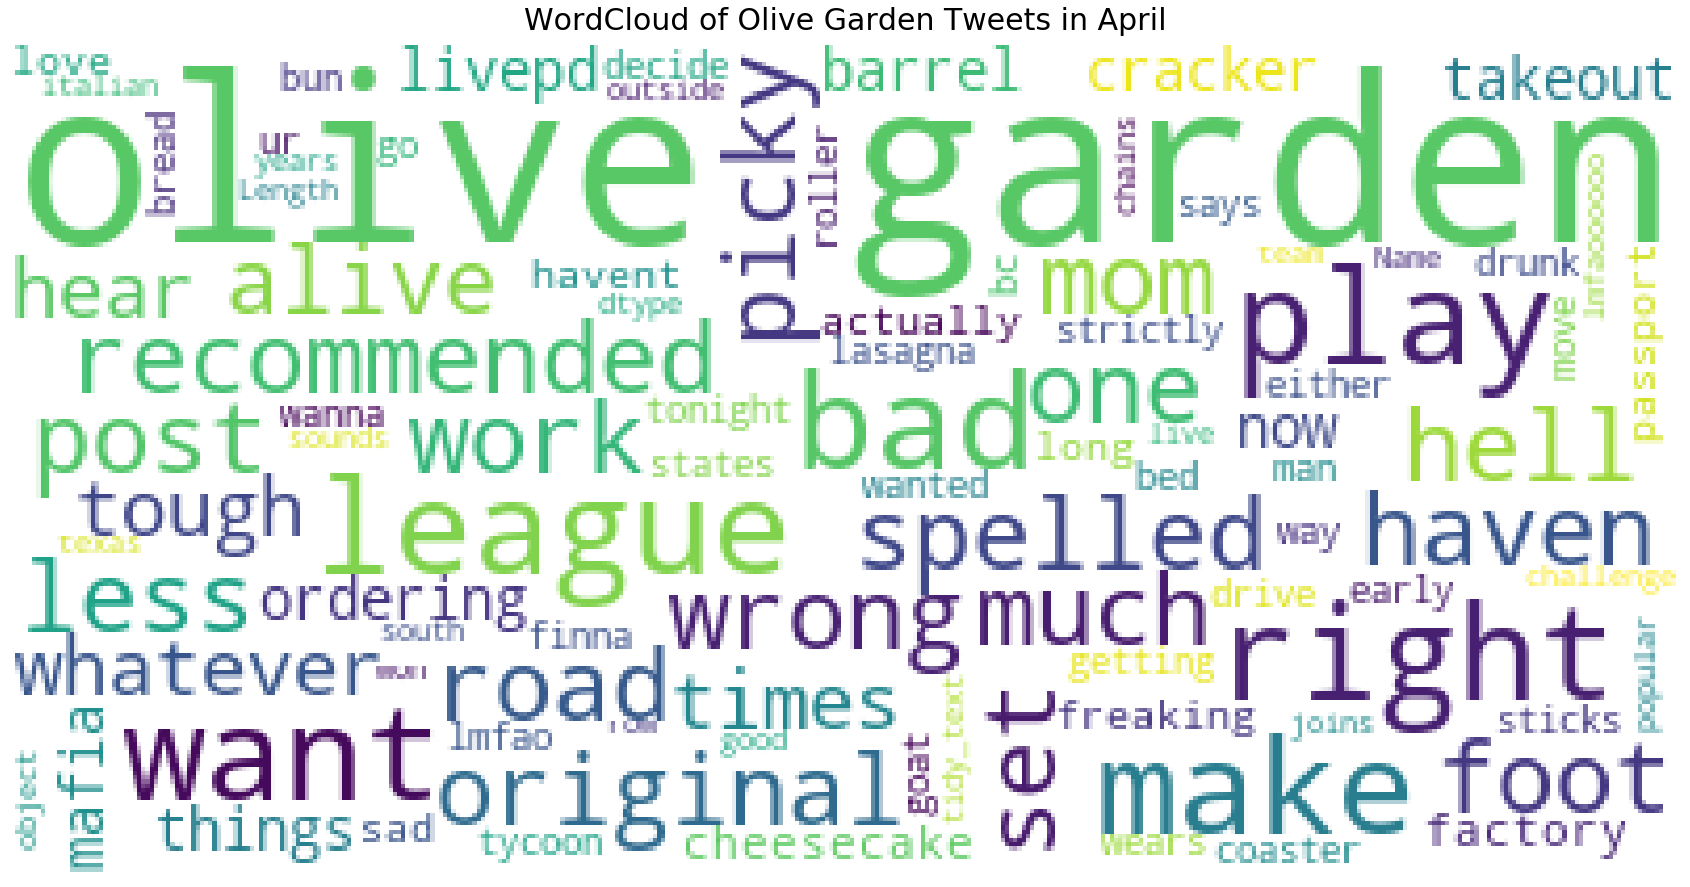

In [0]:
wordcloud(oli_apr.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Tweets in April")

In [0]:
#oli_jan_pos = oli_jan[oli_jan['Sentiment']=='Positive']
#oli_jan_neg = oli_jan[oli_jan['Sentiment']=='Negative']
#oli_jan_neu = oli_jan[oli_jan['Sentiment']=='Neutral']
#oli_mar_pos = oli_mar[oli_mar['Sentiment']=='Positive']
#oli_mar_neg = oli_mar[oli_mar['Sentiment']=='Negative']
#oli_mar_neu = oli_mar[oli_mar['Sentiment']=='Neutral']
#oli_apr_pos = oli_apr[oli_apr['Sentiment']=='Positive']
#oli_apr_neg = oli_apr[oli_apr['Sentiment']=='Negative']
#oli_apr_neu = oli_apr[oli_apr['Sentiment']=='Neutral']

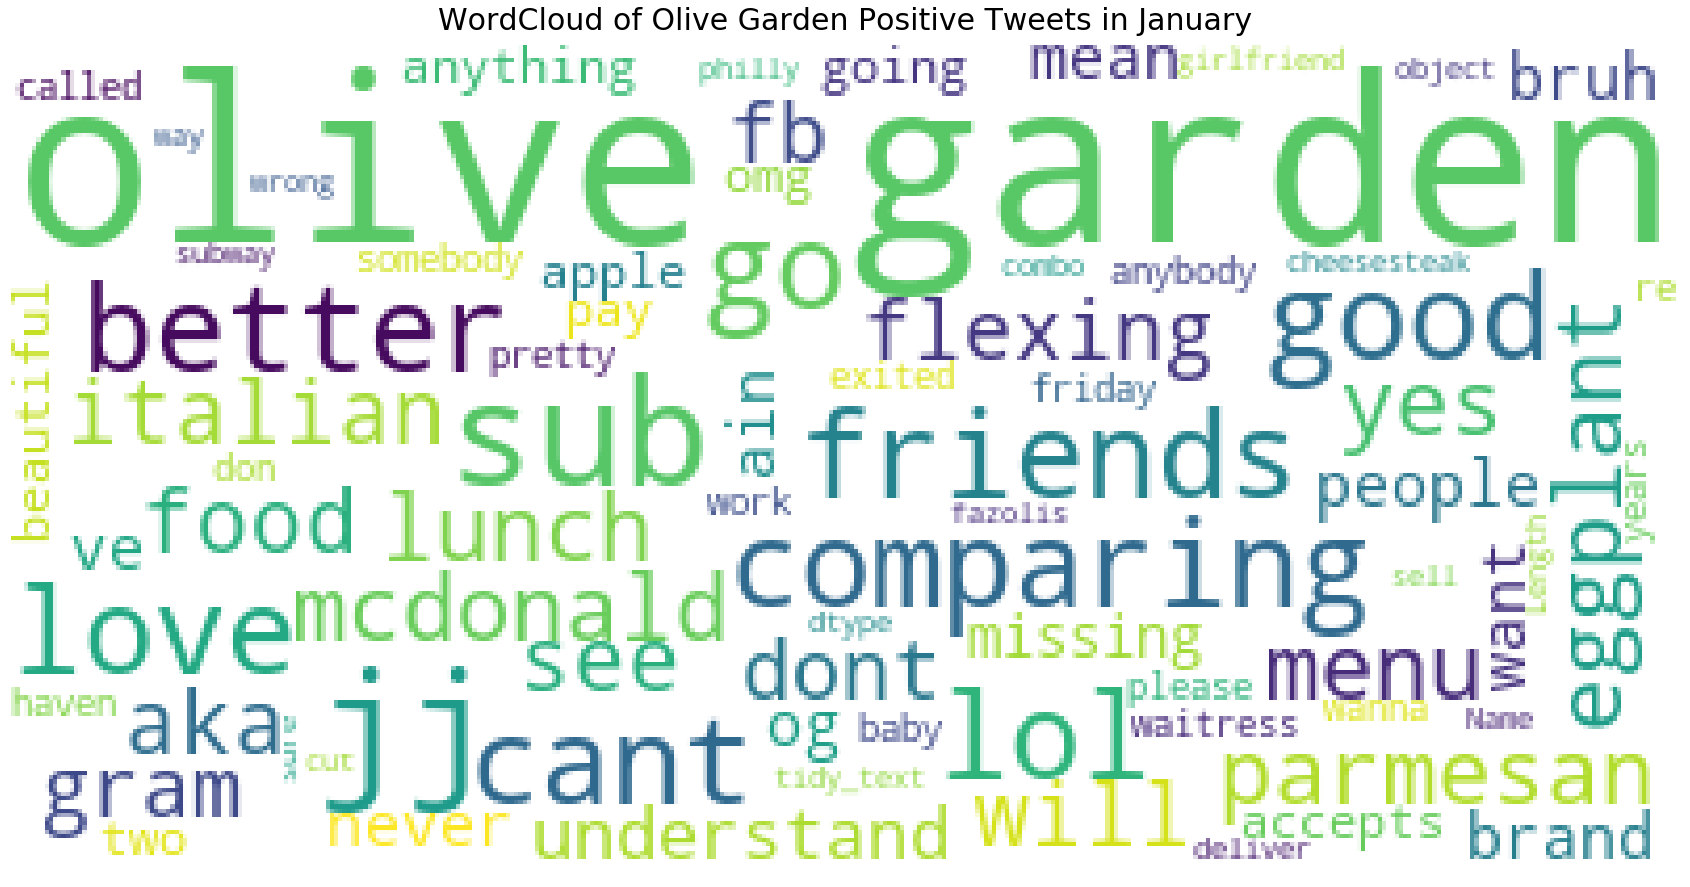

In [0]:
wordcloud(oli_jan_pos.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Positive Tweets in January")

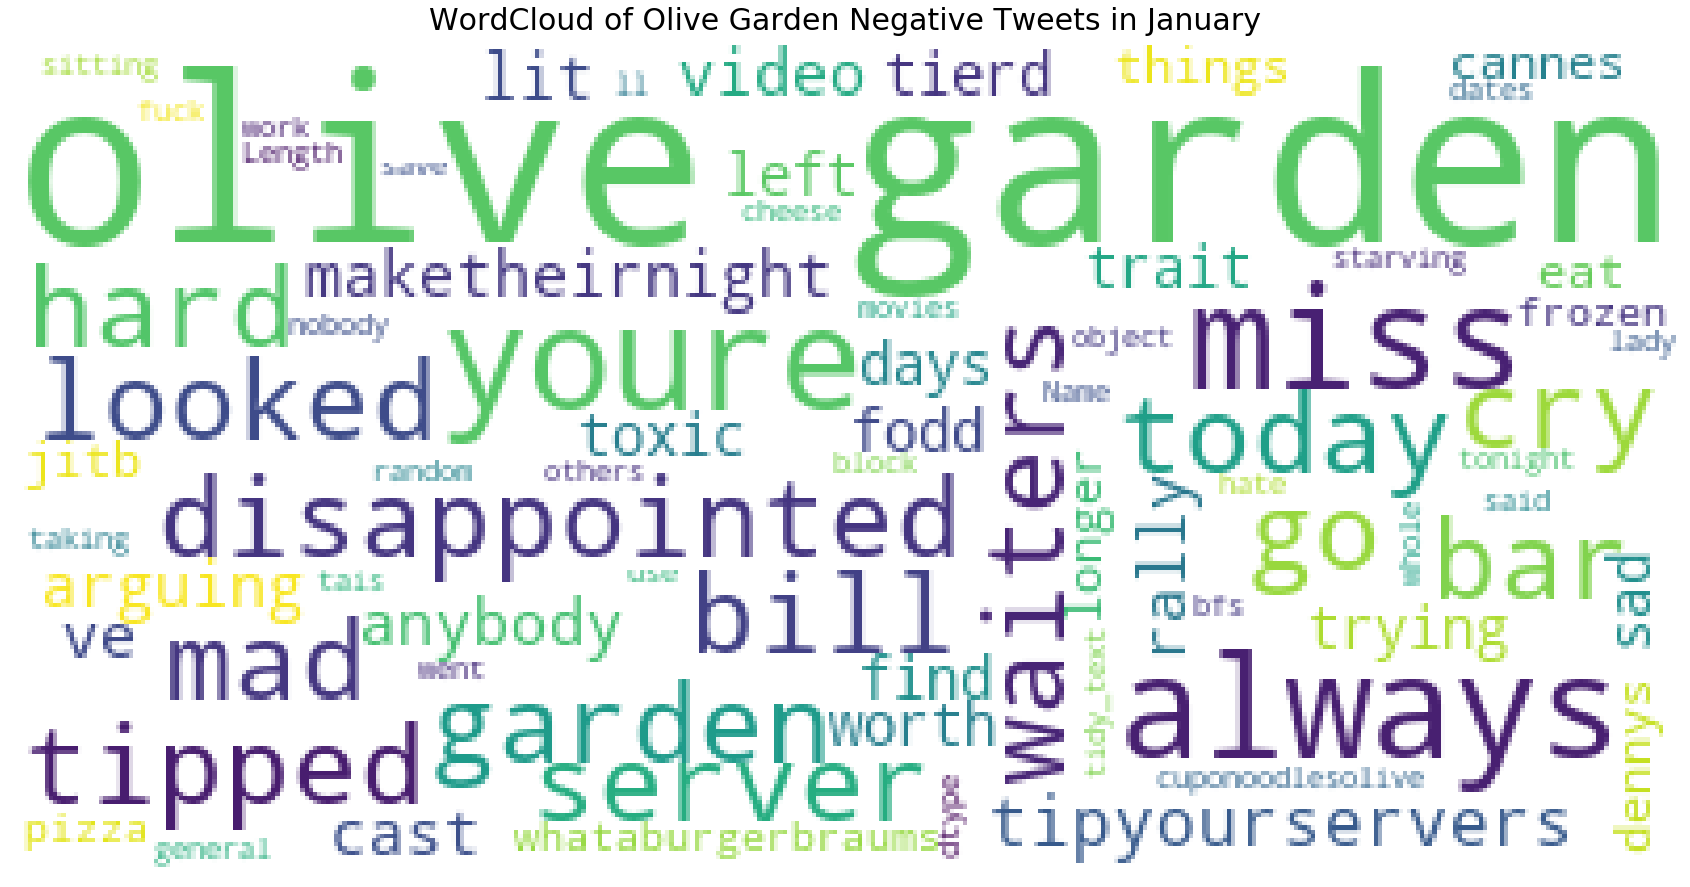

In [0]:
wordcloud(oli_jan_neg.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Negative Tweets in January")

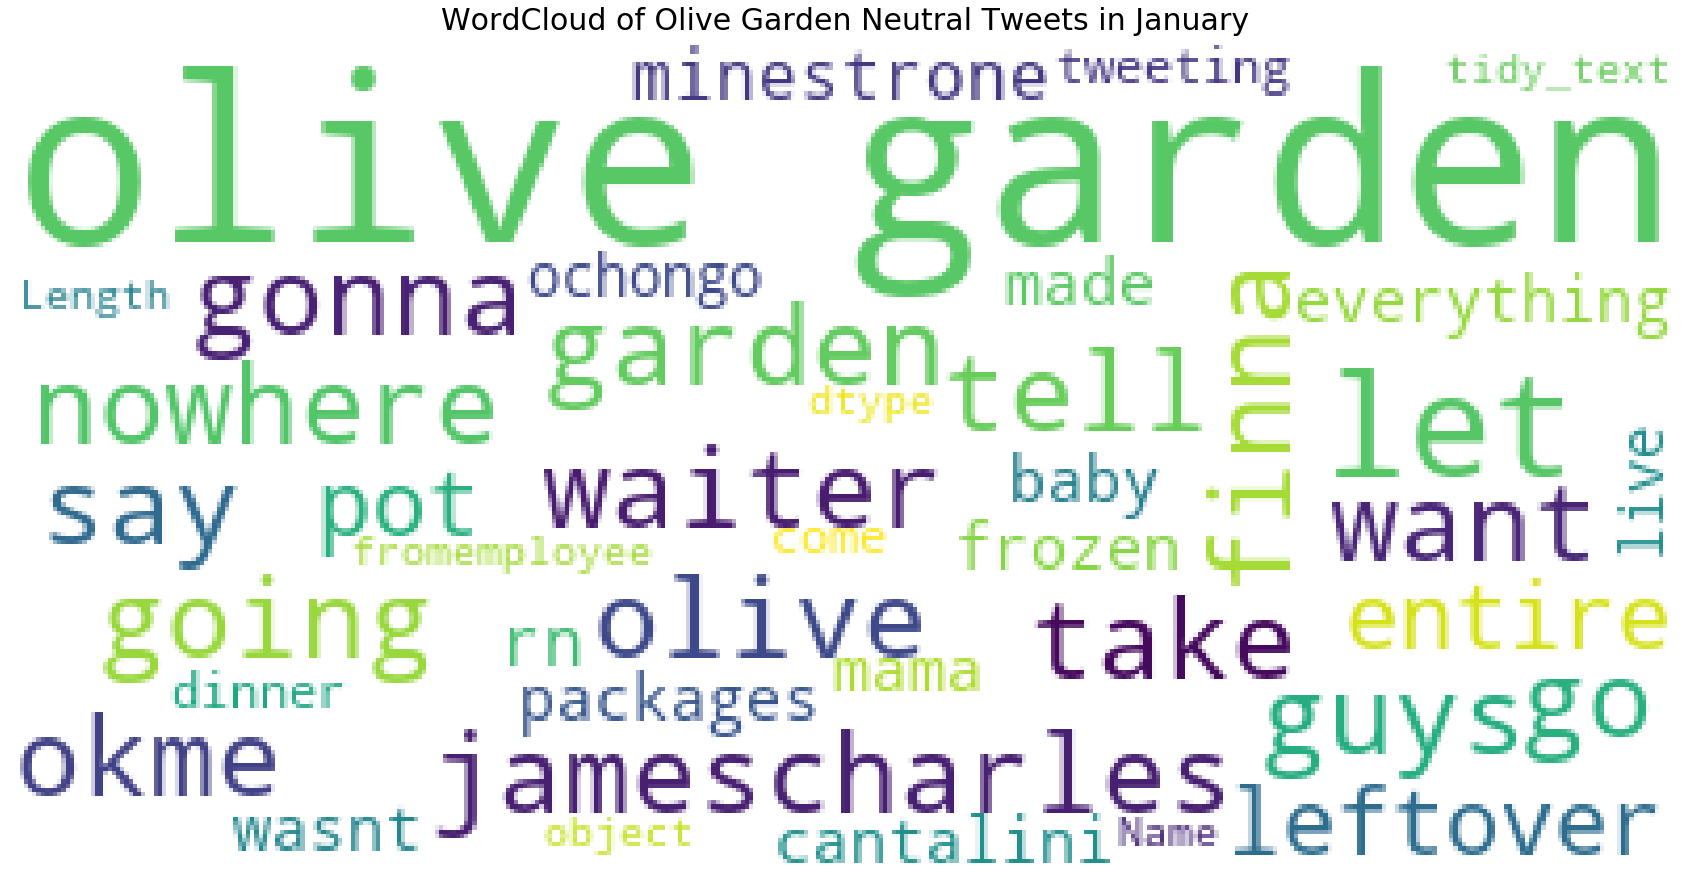

In [0]:
wordcloud(oli_jan_neu.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Neutral Tweets in January")

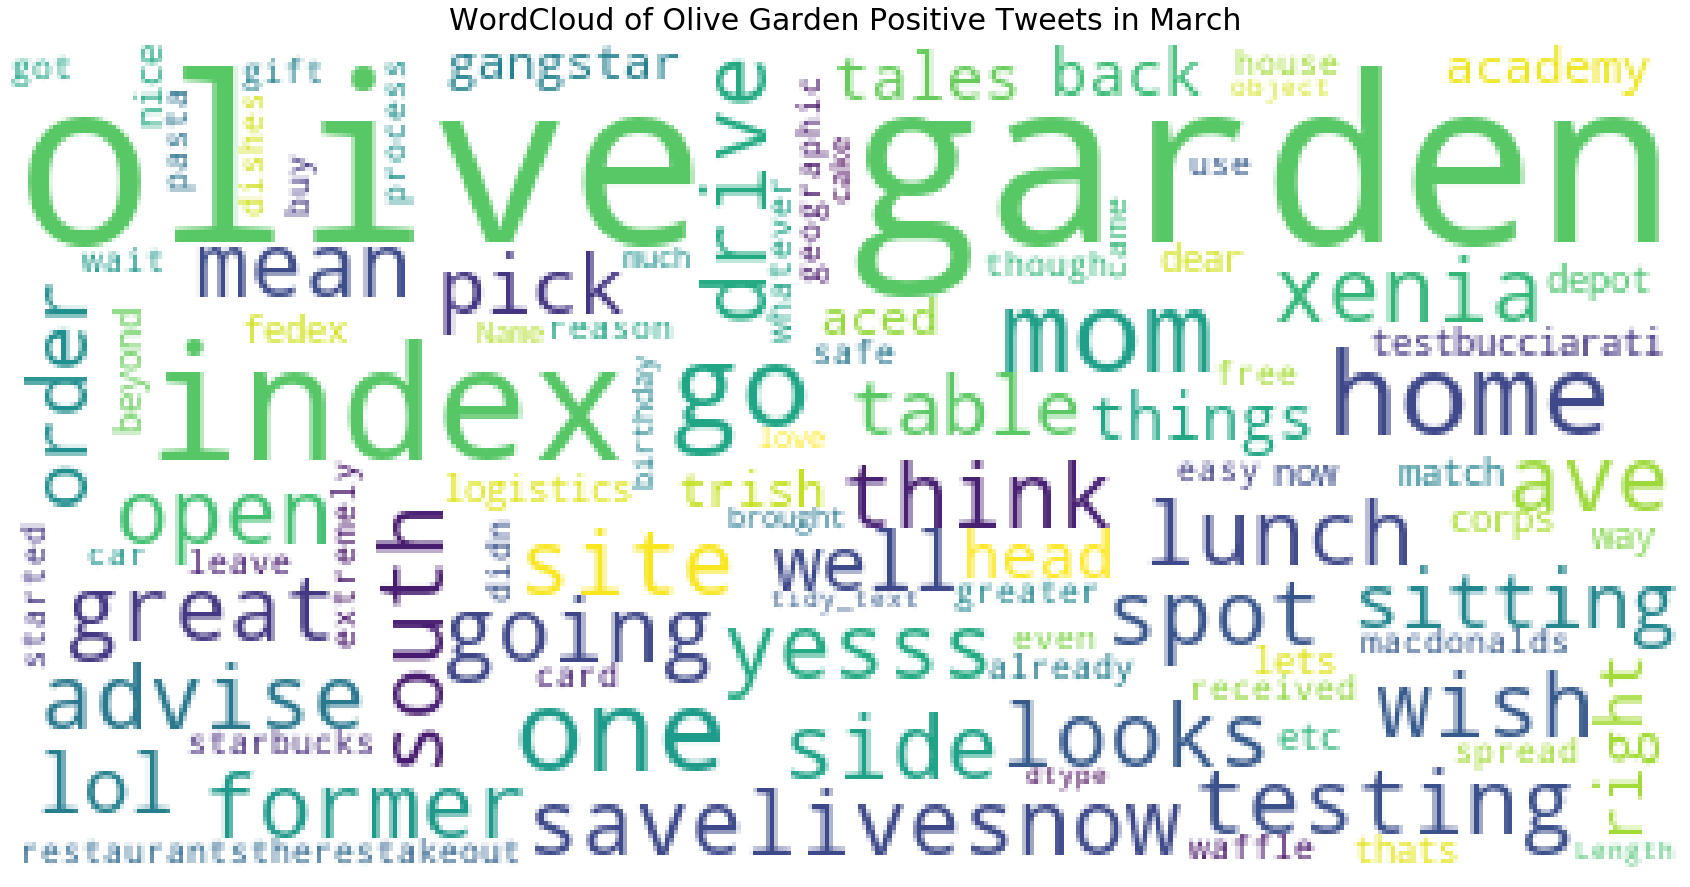

In [0]:
wordcloud(oli_mar_pos.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Positive Tweets in March")

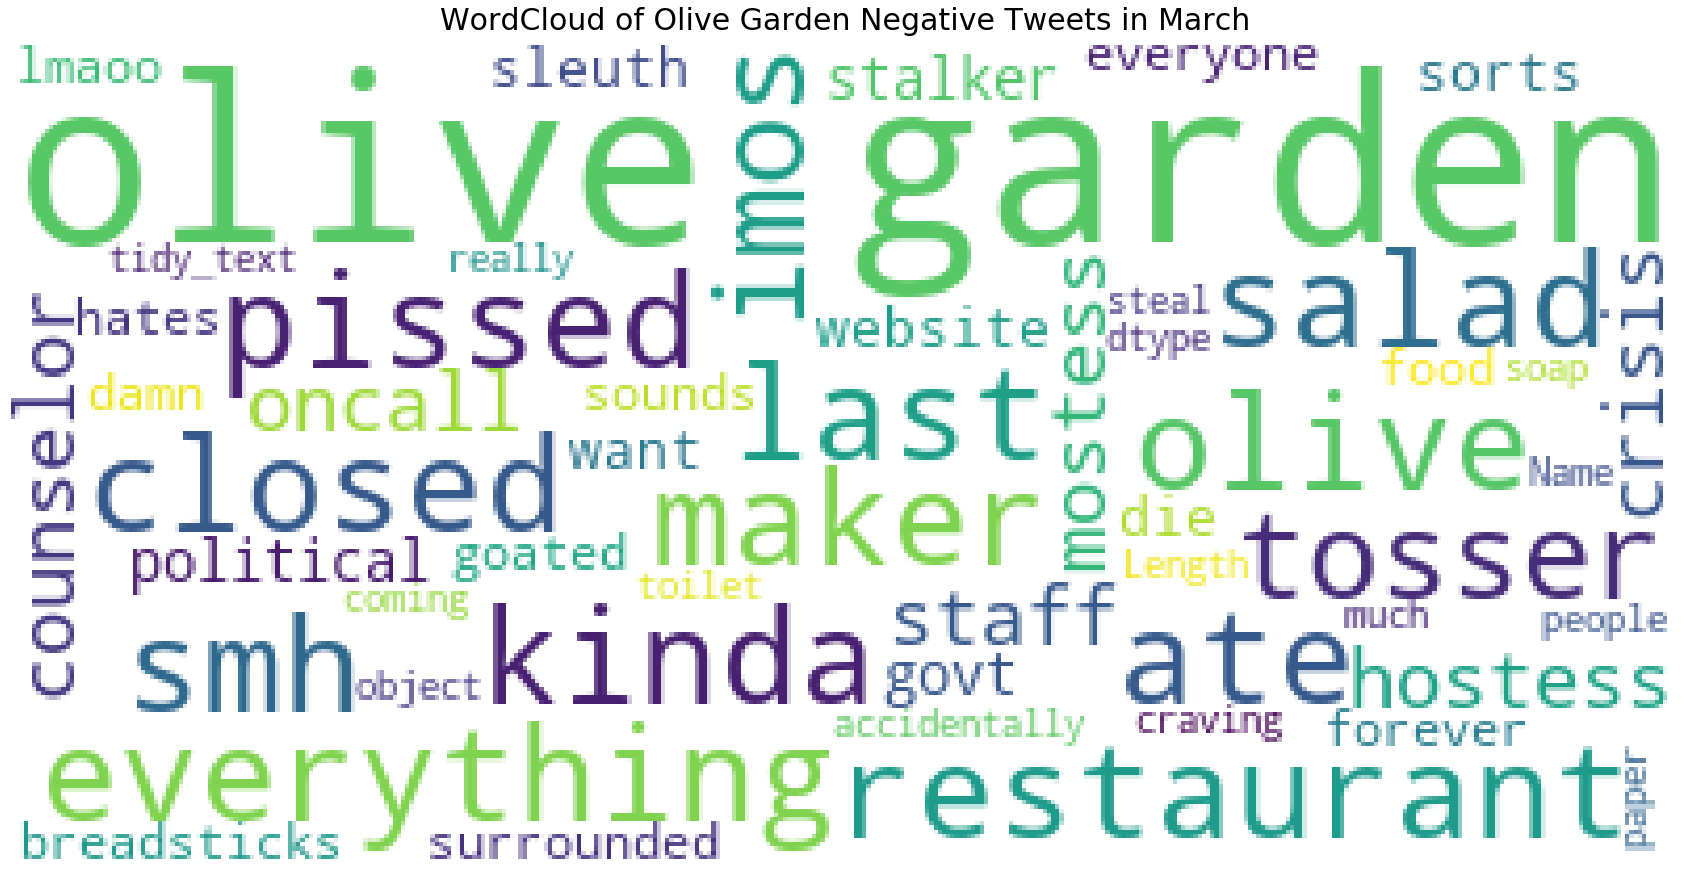

In [0]:
wordcloud(oli_mar_neg.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Negative Tweets in March")

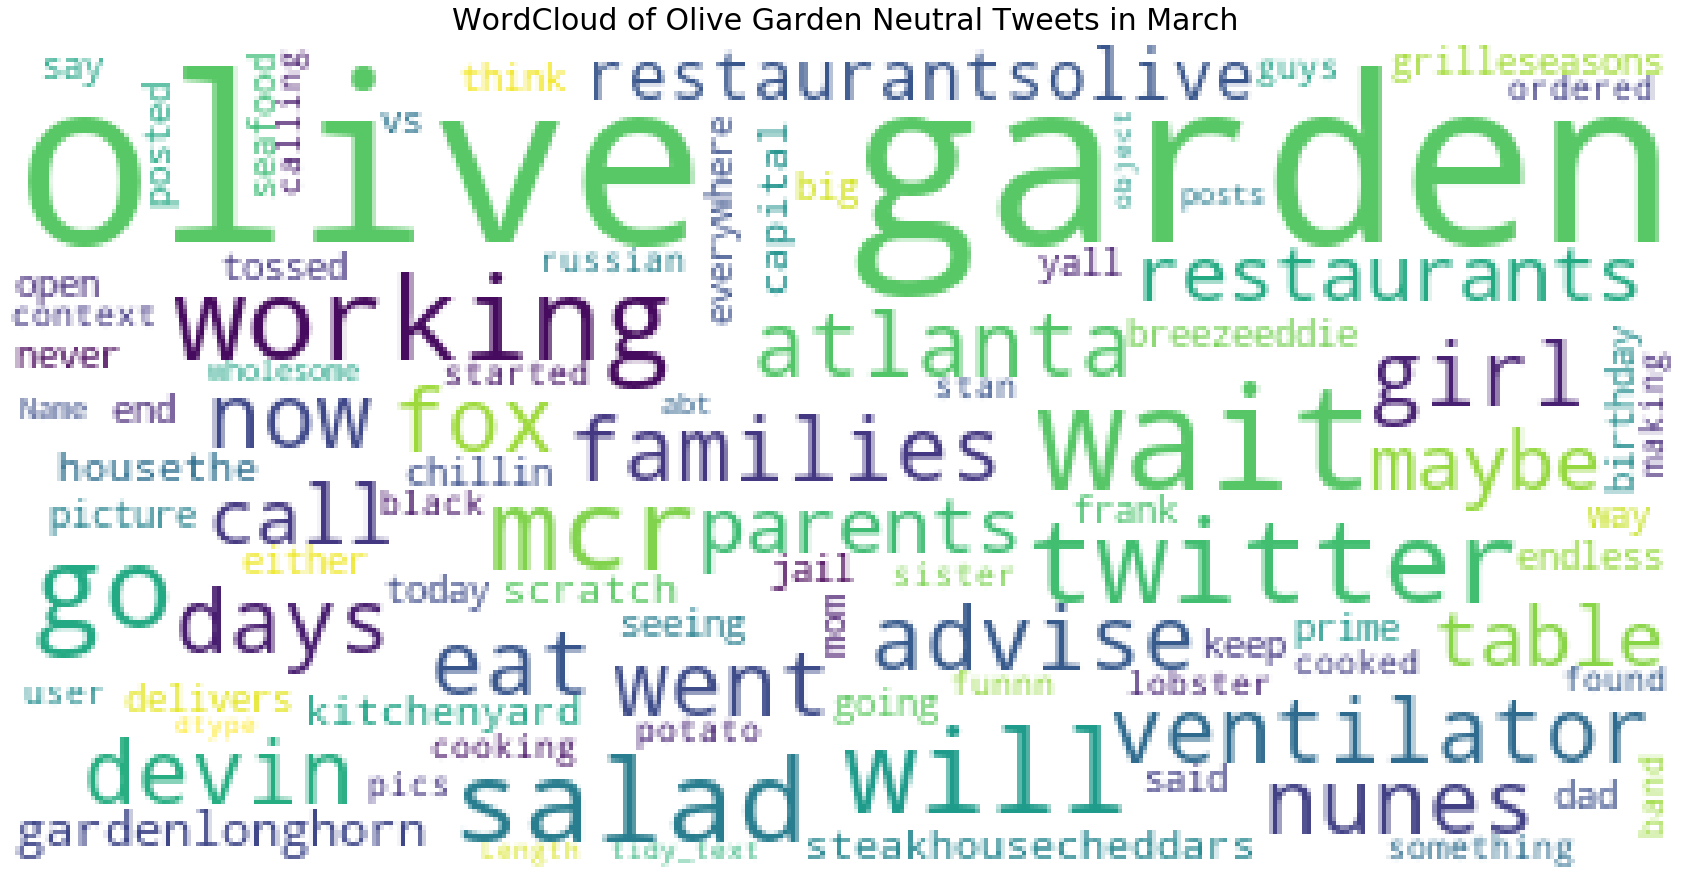

In [0]:
wordcloud(oli_mar_neu.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Neutral Tweets in March")

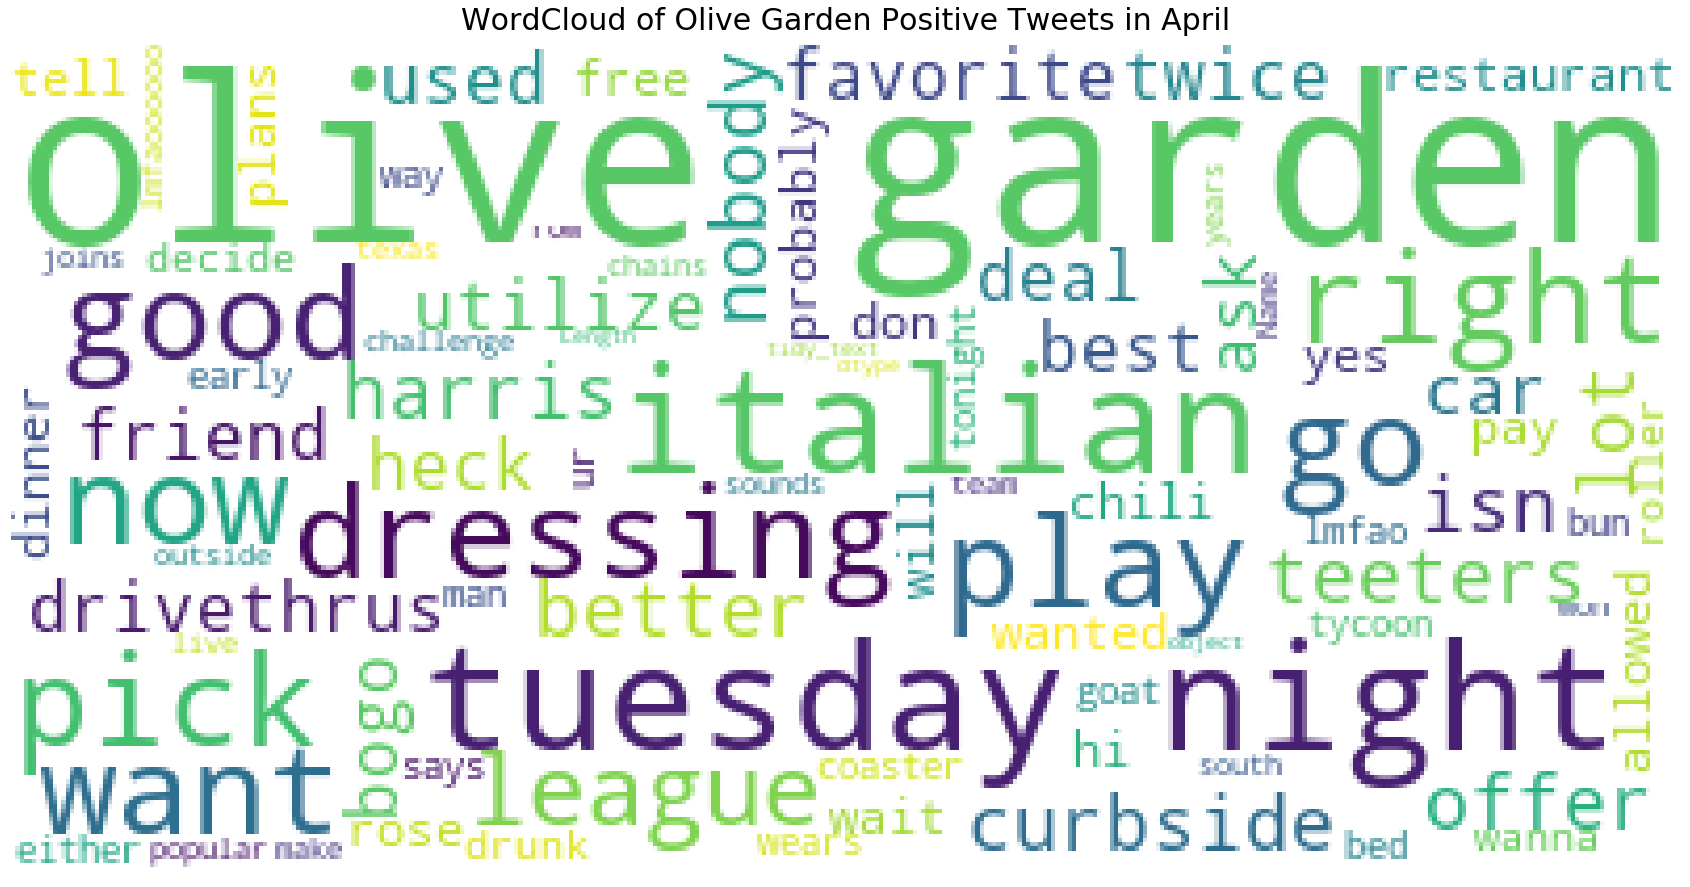

In [0]:
wordcloud(oli_apr_pos.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Positive Tweets in April")

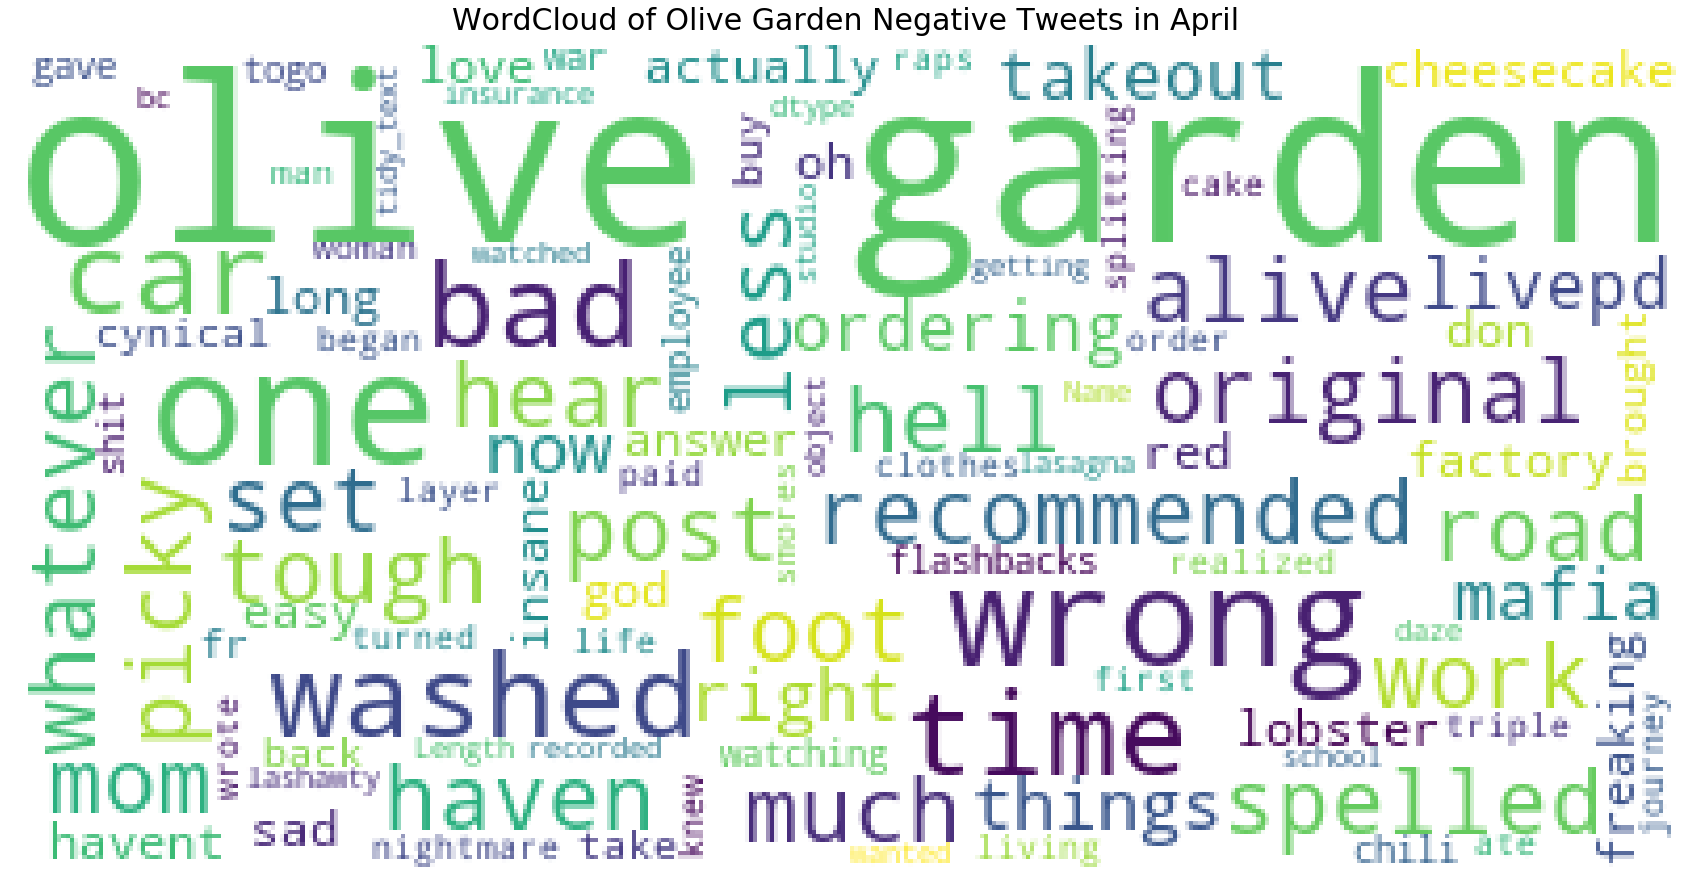

In [0]:
wordcloud(oli_apr_neg.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Negative Tweets in April")

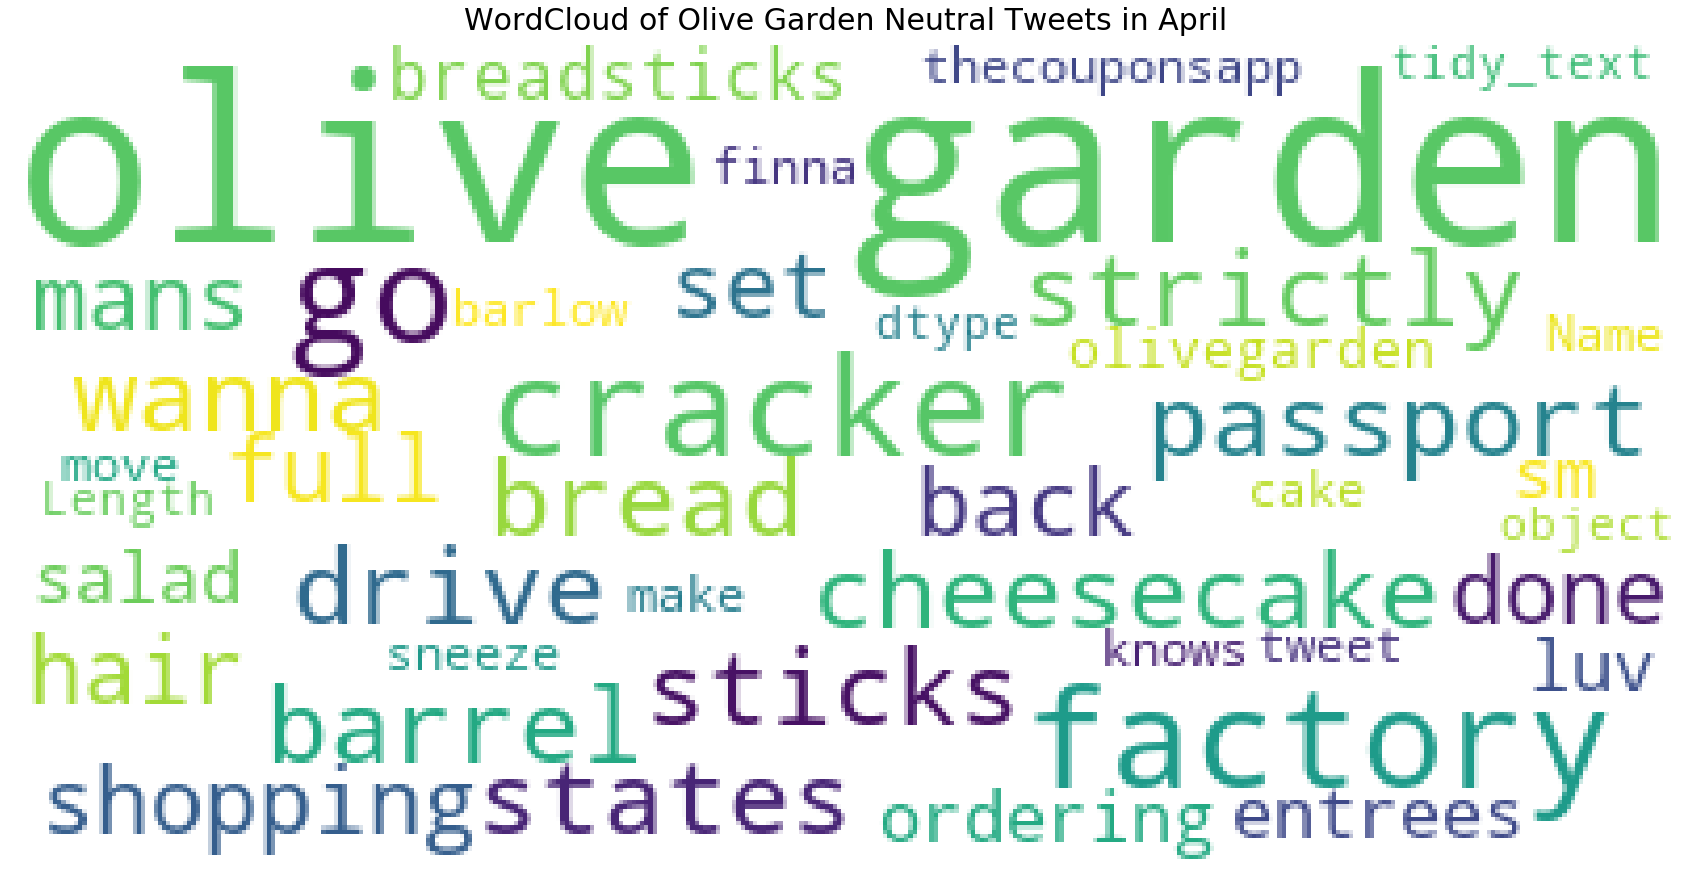

In [0]:
wordcloud(oli_apr_neu.tidy_text, color='white',max_font_size=100,title_size=30,title="WordCloud of Olive Garden Neutral Tweets in April")